In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

In [86]:
#Leemos los datos de Airbnb 
directorio = "/home/lorenamh/Escritorio/keepcoding/Bootcamp/Docu/machine learning/machine-learning-101/project/"
airbnb_data = pd.read_csv(directorio+"airbnb-listings-extract.csv", sep=";") # cargamos fichero
  

In [87]:
airbnb_data.head(5)

ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in Barcelona's most chic dis...   
4  Unique apartment in vibrant neighborhoods, car...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  You wake up to the sun rising over Barcelona's...   
4  License: HUTB-005313 Charming apartment, locat...   

                                         Description Experiences Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   
2  This apartment has: 1 double bed, 1 double sof...                none   
3  Live like a local in Barcelona's most chic dis...                none   
4  Unique apartment in vibrant neighborhoods, car...                none   

                               Neighborhood Overview  ...  \
0  This neighborhood is located in the hills west...  ...   
1  Plaza   Cataluña Catalonia Square is the large...  ...   
2  Plaza   Cataluña Catalonia Square is the large...  ...   
3  We're right in the heart of the chic L'Eixampl...  ...   
4                                                NaN  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                        10.0                   10.0                10.0   
1                        10.0                    8.0                10.0   
2                         NaN                    NaN                 NaN   
3                        10.0                   10.0                 9.0   
4                         NaN                    NaN                 NaN   

       License Jurisdiction Names Cancellation Policy  \
0          NaN                NaN            moderate   
1  HUTB-006721                NaN     super_strict_30   
2  HUTB-007527                NaN     super_strict_30   
3          NaN                NaN              strict   
4          NaN                NaN            flexible   

  Calculated host listings count Reviews per Month  \
0                            1.0              3.50   
1                          106.0              0.86   
2                          106.0               NaN   
3                           24.0              1.09   
4                           92.0               NaN   

                    Geolocation  \
0  30.3373609355,-97.8632766782   
1   41.3896829422,2.17262543017   
2   41.3930345489,2.16217327868   
3    41.3969668101,2.1674178103   
4   41.3886851936,2.15514963616   

                                            Features  
0  Host Is Superhost,Host Has Profile Pic,Host Id...  
1  Host Has Profile Pic,Requires License,Instant ...  
2  Host Has Profile Pic,Requires License,Instant ...  
3  Host Has Profile Pic,Host Identity Verified,Re...  
4  Host Has Profile Pic,Host Identity Verified,Is...  

[5 rows x 89 columns]

In [88]:
airbnb_data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Antes de empezar, vamos a eliminar todas las variables que identifiquen un apartamento,anuncio, o al anunciante ya que no aportaran nada.
Es decir ID,Listing Url,Scrape ID, Last Scraped,Thumbnail Url,Medium Url,Picture Url, XL Picture Url,Host ID, Host URL, Host Name,Host Thumbnail Url, Host Picture Url

In [89]:
airbnb_data = airbnb_data .drop(['ID','Listing Url','Scrape ID', 'Last Scraped','Thumbnail Url','Medium Url','Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host Name','Host Thumbnail Url', 'Host Picture Url' ], axis=1)

In [90]:
airbnb_data.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
   

Queremos que test y train tengan las mismas características estadísticas, y por tanto, para
hacer train y test tenemos que coger una muestra aleatoria evitando de esta forma posibles sesgos por algún posible evento que haya podido haber.No es necesario estratificar porque no es un problema de clasificación 
dividimos entre train ( 80%) y test( 20%).

In [91]:
#Dividimos entre test y train
from sklearn.model_selection import train_test_split
y1 = airbnb_data['Price']
X1 = airbnb_data.drop(['Price'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, shuffle = True, random_state = 0)

count    11809.000000
mean        73.712592
std         71.624844
min          9.000000
25%         34.000000
50%         55.000000
75%         87.000000
max        969.000000
Name: Price, dtype: float64


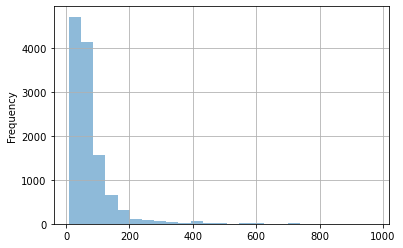

In [92]:
#Análisis de la variable objetivo Price
print(y_train.describe().T)
y_train.plot.hist(alpha=0.5, bins=25, grid = True)
plt.show()

Vemos como la variable price es asimétrica, para que tenga una distribución más parecida a la normal, la vamos a transformar en logaritmo.

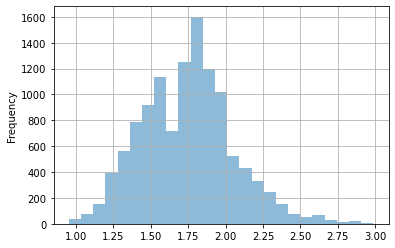

In [93]:
#Hacemos una transformación logaritmica para ver si la distribución se aproxima más a la normal
y_train_log = np.log10(y_train)
y_train_log.plot.hist(alpha=0.5, bins=25, grid = True)
plt.show()

In [94]:
#Dada la distribución vamos a usar como variable objetivo el logaritmo del precio
y_train = np.log10(y_train)

Antes de hacer un análisis exploratorio, con el fin de de reducir el número de variables empiezo viendo que variables categóricas puedo eliminar y cómo codificarlas.

In [ ]:
# Tratamiento para las variables categóricas 

In [95]:
X_train.describe(exclude=[np.number]).T  

count unique  \
Name                          11823  11523   
Summary                       11355  10686   
Space                          8718   8200   
Description                   11818  11459   
Experiences Offered           11824      5   
Neighborhood Overview          7309   6426   
Notes                          4543   3822   
Transit                        7243   6353   
Access                         6663   5781   
Interaction                    6594   5375   
House Rules                    7681   6494   
Host Since                    11821   2043   
Host Location                 11790    497   
Host About                     7664   4248   
Host Response Time            10317      4   
Host Acceptance Rate             30     10   
Host Neighbourhood             8742    353   
Host Verifications            11820    191   
Street                        11824   1438   
Neighbourhood                  7665    351   
Neighbourhood Cleansed        11824    444   
Neighbourhood Group Cleansed  11006     47   
City                          11820    222   
State                         11705     93   
Zipcode                       11426    535   
Market                        11780     42   
Smart Location                11824    232   
Country Code                  11824     18   
Country                       11823     17   
Property Type                 11824     21   
Room Type                     11824      3   
Bed Type                      11824      5   
Amenities                     11683  10077   
Calendar Updated              11824     57   
Has Availability                  9      1   
Calendar last Scraped         11824     38   
First Review                   9285   1583   
Last Review                    9284    730   
License                         277    252   
Jurisdiction Names              174     11   
Cancellation Policy           11824      8   
Geolocation                   11824  11824   
Features                      11823     86   

                                                                            top  \
Name                                         Apartamento en el centro de Madrid   
Summary                       Unique apartment in vibrant neighborhoods, car...   
Space                         Los Apartamentos Good Stay Prado se encuentran...   
Description                   Es un piso con 6 habitaciones de las que 5  ha...   
Experiences Offered                                                        none   
Neighborhood Overview         Se trata de una de las zonas más emblemáticas ...   
Notes                         Apartamentos Temporales has over 100 apartment...   
Transit                       It is calm, quite zone and you don’t have to s...   
Access                        Wifi, TV, washing machine, Microwave, full equ...   
Interaction                   We will arrange the check in time depending on...   
House Rules                   Checkin is done at our office. The address: Ca...   
Host Since                                                           2016-01-12   
Host Location                                Madrid, Community of Madrid, Spain   
Host About                    Be Mate offers the exclusive City Mate service...   
Host Response Time                                               within an hour   
Host Acceptance Rate                                                       100%   
Host Neighbourhood                                                     Malasaña   
Host Verifications                                    email,phone,reviews,jumio   
Street                        Embajadores, Madrid, Comunidad de Madrid 28012...   
Neighbourhood                                                          Malasaña   
Neighbourhood Cleansed                                              Embajadores   
Neighbourhood Group Cleansed                                             Centro   
City                                                                     Madrid   
State        

Vamos a eliminar aquellas variables que son de texto libre, y no podemos sacar información fácilmente. De alguna de ellas lo que haremos, será crear nuevas variables para identificar si tienen wifi, parking, o si están cerca del metro, etc.
Eliminamos aquellas variables que son repetitivas por ejemplo país y código pais.


In [96]:
X_train = X_train.drop(['Name', 'Summary', 'Space', 'Description','Neighborhood Overview','Access','Notes','Interaction','House Rules','Host Location','Host About','Host Acceptance Rate',
'Host Neighbourhood','Host Verifications','Neighbourhood Cleansed','Street','Smart Location','Country Code','Calendar Updated',
'Has Availability','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Geolocation','Features','Neighbourhood Group Cleansed'],axis= 1)

Categorizamos las variables categóricas interesantes.

Cancellation Policy:
    En primer lugar agrupamos, ya que hay categorías como flexible_new que incluiremos dentro de flexible.

In [97]:
X_train['Cancellation Policy'].loc[X_train['Cancellation Policy']=='flexible_new']='flexible'
X_train['Cancellation Policy'].loc[X_train['Cancellation Policy']=='moderate_new']='moderate'
X_train['Cancellation Policy'].loc[X_train['Cancellation Policy']=='strict_new']='strict'

/home/lorenamh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


En este caso para codificarla,voy a usar OrdinalEncoder, para poder fijar el orden de la codificación, ya que para este caso existe un orden lógico de menos a más restricción en la política de cancelación.

In [98]:
from sklearn.preprocessing import OrdinalEncoder
encoder_cancellation_policy = OrdinalEncoder(categories=[['flexible','moderate','strict','super_strict_30', 'super_strict_60']])

# Ajustamos el codificador de la variable cancellation
encoder_cancellation_policy.fit(X_train[['Cancellation Policy']])
X_train['Cancellation Policy'] = encoder_cancellation_policy.transform(X_train[['Cancellation Policy']])


Bed type: En este caso tal vez no es tan claro, pero voy a usar también OrdinalEncoder, y ordeno de menos cómodo a más cómodo.

In [99]:

encoder_Bed_Type = OrdinalEncoder(categories=[['Airbed','Couch','Pull-out Sofa','Futon', 'Real Bed']])

# Ajustamos el codificador de la variable bed type
encoder_Bed_Type .fit(X_train[['Bed Type']])
X_train['Bed Type'] = encoder_Bed_Type .transform(X_train[['Bed Type']])

Room Type: mismo método de codificación, en este caso de menos a más intimidad.

In [100]:
encoder_room_type = OrdinalEncoder(categories=[['Shared room','Private room','Entire home/apt']])

# Ajustamos el codificador de la variable cancellation
encoder_room_type.fit(X_train[['Room Type']])
X_train['Room Type'] = encoder_room_type.transform(X_train[['Room Type']])


Host Response Time: Lo codificamos de menos a más tiempo en responder.

In [101]:

X_train['Host Response Time']= X_train['Host Response Time'].fillna("NULO")
encoder_host_response_time = OrdinalEncoder(categories=[["within an hour", "within a few hours", 
                                      "within a day", "a few days or more","NULO"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder_host_response_time .fit(X_train[['Host Response Time']])
X_train['Host Response Time'] = encoder_host_response_time.transform(X_train[['Host Response Time']])

Host Senority: La codifico como años de antiguedad del Host.

In [102]:
import datetime
X_train['Host Senority'] = (X_train[['Host Since']].apply(pd.to_datetime))
X_train['Host Senority'] =2017-X_train['Host Senority'].apply(lambda x: x.year)

A partir de la variable Amenities, creo otro conjunto de variables:

    *WIFI: Si hay o no wifi
    *AIR CONDITIONER: Si hay o no aire acondicionado
    *SMOKE: Si se puede o no fumar
    *POOL: Si hay o no piscina
    *PARKING: Si hay o no parking
    *ELEVATOR: Si hay o no ascensor
    *HEAT: Si hay o no calefacción

In [103]:
X_train['WIFI']=((X_train['Amenities'].str.upper().str.contains('WIRELESS'))*1).fillna(0).astype(int)
X_train['Air Conditioner']=((X_train['Amenities'].str.upper().str.contains('AIR'))*1).fillna(0).astype(int)
X_train['SMOKE']=((X_train['Amenities'].str.upper().str.contains('SMOKING ALLOWED'))*1).fillna(0).astype(int)
X_train['POOL']=((X_train['Amenities'].str.upper().str.contains('POOL'))*1).fillna(0).astype(int)
X_train['PARKING']=((X_train['Amenities'].str.upper().str.contains('PARKING'))*1).fillna(0).astype(int)
X_train['ELEVATOR']=((X_train['Amenities'].str.upper().str.contains('ELEVATOR'))*1).fillna(0).astype(int)
X_train['HEAT']=((X_train['Amenities'].str.upper().str.contains('HEAT'))*1).fillna(0).astype(int)
#X_train['HEAT']=(X_train['Amenities'].str.upper().str.contains('HEAT', regex=False)== 'true')*1

Transit: Asumimos que si aparece la palabra metro, indica que está cerca de alguna parada de metro.

In [104]:
X_train['METRO'] = ((X_train['Transit'].str.upper().str.contains('METRO'))*1).fillna(0).astype(int)

Nos quedan menos variables categóricas por codificar.

In [105]:
X_train.describe(exclude=[np.number]).T  

count unique  \
Experiences Offered  11824      5   
Transit               7243   6353   
Host Since           11821   2043   
Neighbourhood         7665    351   
City                 11820    222   
State                11705     93   
Zipcode              11426    535   
Market               11780     42   
Country              11823     17   
Property Type        11824     21   
Amenities            11683  10077   

                                                                   top   freq  
Experiences Offered                                               none  11810  
Transit              It is calm, quite zone and you don’t have to s...     36  
Host Since                                                  2016-01-12    148  
Neighbourhood                                                 Malasaña    693  
City                                                            Madrid  10567  
State                                              Comunidad de Madrid   8507  
Zipcode                                                          28012   1663  
Market                                                          Madrid  10621  
Country                                                          Spain  11203  
Property Type                                                Apartment   9598  
Amenities            TV,Internet,Wireless Internet,Air conditioning...     38

Gráfico para cada variable cualitativa de Experienxes Offered, Property Type y Country, ya que no tienen 
demasiadas categorías. A la hora de trabajar con ellas no siguen un orden lógico como las anteriores, vemos por tanto como se distribuyen por si merece o no la pena pensar como tratarlas.

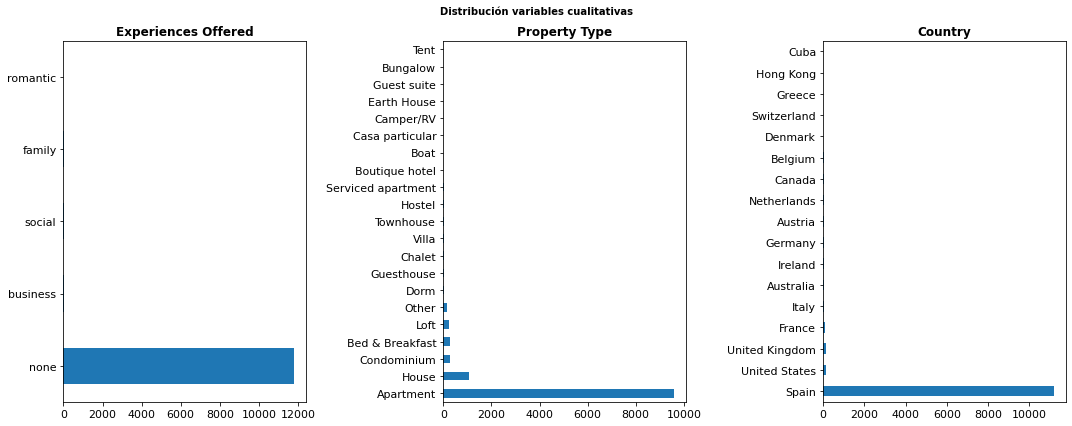

In [106]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
axes = axes.flat
columnas_object = X_train.describe(exclude=[np.number]).columns
columnas_object   = ['Experiences Offered','Property Type','Country']

for i, colum in enumerate(columnas_object):
    X_train[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");


Experiences Offered directamente la vamos a quitar del dataset, ya que prácticamente todos los apartamentos tienen
#None

In [107]:

X_train['Experiences Offered'].value_counts().sort_index()

business        6
family          3
none        11810
romantic        2
social          3
Name: Experiences Offered, dtype: int64

Con Property Type pasa más o menos lo menos, el 81% de la muestra son apartamentos, y casi otro 10% son House.

In [108]:

X_train['Property Type'].value_counts().sort_index()/X_train['Property Type'].count()

Apartment             0.811739
Bed & Breakfast       0.023173
Boat                  0.000254
Boutique hotel        0.000423
Bungalow              0.000169
Camper/RV             0.000254
Casa particular       0.000254
Chalet                0.001861
Condominium           0.024019
Dorm                  0.003129
Earth House           0.000169
Guest suite           0.000169
Guesthouse            0.002706
Hostel                0.001099
House                 0.091763
Loft                  0.020974
Other                 0.014462
Serviced apartment    0.000761
Tent                  0.000085
Townhouse             0.001269
Villa                 0.001269
Name: Property Type, dtype: float64

Si no queremos eliminarla, y queremos ver si puede ser relevante o no, podemos categorizar en Apartment, House y otros, para hacer la prueba.


In [109]:
X_train['Property Type'].loc[((X_train['Property Type']=='Apartment') |(X_train['Property Type']=='House') ) ==False] = 'Other' 
encoder_Property_Type = OrdinalEncoder(categories=[["Other", "Apartment", 
                                      "House"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder_Property_Type .fit(X_train[['Property Type']])
X_train['Property Type'] = encoder_Property_Type .transform(X_train[['Property Type']])

/home/lorenamh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Nos queda estudiar aquellas que tienen que ver con la localización:
Country,Market,State,City,Zipcode,Neighbourhood.
Neighbourhood tiene más o menos el 50% del dataset, y zipcode baja demasiado, y muchos de ellos tienen una muestra irrisoria.
En cuanto a City, prácticamente el total de la muestra es Madrid, nos vamos a quedar por tanto solo con la muestra de los apartamentos de esta ciudad.


In [110]:
#En este caso vamos a usar Label encoding ya que no tenemos un orden lógico del market
Market_global = X_train['City'].value_counts()
Market_global

Madrid              10567
Barcelona             235
London                104
Paris                  85
Palma                  44
                    ...  
Cologny                 1
Pina, Mallorca          1
Port de Pollença        1
Chelsea, London         1
Chueca, Madrid          1
Name: City, Length: 222, dtype: int64

Hay muchas ciudades con pocas muestras, y dado que más del 90% de dataset es Madrid, directamente vamos a analizar los precios en la ciudad de Madrid, y por tanto puede eliminar todas la variables como País, ciudad, Market, etc

In [111]:
X_train = X_train[X_train['City']=='Madrid']

In [112]:
X_train = X_train.drop(['Host Since', 'Amenities','Transit','Experiences Offered','City','Country',
                       'State','Zipcode','Market'],axis = 1)

Solo nos queda como variable categórica Neighbourhood, vamos a probar eliminandola y suponiendo que latitud y longitud recogerá el efecto de la localización.

In [113]:
X_train = X_train.drop(['Neighbourhood'],axis = 1)

In [114]:
# Comenzamos el analisis exploratorio
X_train.describe().T

count         mean          std         min  \
Host Response Time              10567.0     0.991294     1.361611    0.000000   
Host Response Rate               9254.0    94.816944    15.283509    0.000000   
Host Listings Count             10564.0     9.994226    27.967653    0.000000   
Host Total Listings Count       10564.0     9.994226    27.967653    0.000000   
Latitude                        10567.0    40.420436     0.019802   40.332908   
Longitude                       10567.0    -3.697122     0.023267   -3.835498   
Property Type                   10567.0     0.971988     0.414770    0.000000   
Room Type                       10567.0     1.585407     0.520148    0.000000   
Accommodates                    10567.0     3.188228     1.989624    1.000000   
Bathrooms                       10527.0     1.256863     0.608184    0.000000   
Bedrooms                        10549.0     1.294909     0.833250    0.000000   
Beds                            10530.0     1.992688     1.529786    1.000000   
Bed Type                        10567.0     3.956752     0.298782    0.000000   
Square Feet                       413.0   375.266344   556.981908    0.000000   
Weekly Price                     2697.0   370.569892   190.764771   70.000000   
Monthly Price                    2673.0  1355.562290  1001.426079  250.000000   
Security Deposit                 4549.0   183.864586   110.595924   70.000000   
Cleaning Fee                     6282.0    30.025310    27.097579    5.000000   
Guests Included                 10567.0     1.569225     1.072125    1.000000   
Extra People                    10567.0     7.422920    10.616849    0.000000   
Minimum Nights                  10567.0     3.091984    14.131654    1.000000   
Maximum Nights                  10567.0   976.684016  9928.723799    1.000000   
Availability 30                 10567.0     8.705593     9.066953    0.000000   
Availability 60                 10567.0    22.830415    19.500273    0.000000   
Availability 90                 10567.0    39.962998    29.329072    0.000000   
Availability 365                10567.0   205.701145   127.087815    0.000000   
Number of Reviews               10567.0    23.163055    38.364933    0.000000   
Review Scores Rating             8281.0    91.584833     9.111923   20.000000   
Review Scores Accuracy           8265.0     9.404961     0.937778    2.000000   
Review Scores Cleanliness        8270.0     9.320556     1.007962    2.000000   
Review Scores Checkin            8259.0     9.626105     0.790429    2.000000   
Review Scores Communication      8269.0     9.647599     0.753407    2.000000   
Review Scores Location           8256.0     9.546512     0.759526    2.000000   
Review Scores Value              8257.0     9.207824     0.965451    2.000000   
Cancellation Policy             10567.0     1.055361     0.838153    0.000000   
Calculated host listings count  10567.0     7.766727    19.905940    1.000000   
Reviews per Month                8388.0     1.927200     1.891259    0.020000   
Host Senority                   10564.0     2.702291     1.623945    0.000000   
WIFI                            10567.0     0.957131     0.202572    0.000000   
Air Conditioner                 10567.0     0.764550     0.424300    0.000000   
SMOKE                           10567.0     0.262137     0.439817    0.000000   
POOL                            10567.0     0.046276     0.210092    0.000000   
PARKING                         10567.0     0.070597     0.256163    0.000000   
ELEVATOR                        10567.0     0.610675     0.487620    0.000000   
HEAT                            10567.0     0.910003     0.286191    0.000000   
METRO                           10567.0     0.500237     0.500024    0.000000   

                                       25%          50%          75%  \
Host Response Time                0.000000     0.000000     2.000000   
Host Response Rate              100.000000   100.000000   100.000000   
Host Listi

Vemos muchos NA para Cleaning Fee y Security Deposit, en esos casos parece que cuando es NA es que no hay ese tipo de fees, entonces vamos a rellenar con ceros.

In [115]:

X_train['Cleaning Fee']=X_train['Cleaning Fee'].fillna(0)
X_train['Security Deposit'] = X_train['Cleaning Fee'].fillna(0)


Vamos a ver cuántos valores nulos hay por variable, y cuando tengamos más del 10% de valores nulos, vamos a eliminar la columna.

In [116]:
X_train.isnull().sum(axis = 0)/X_train.shape[0]

Host Response Time                0.000000
Host Response Rate                0.124255
Host Listings Count               0.000284
Host Total Listings Count         0.000284
Latitude                          0.000000
Longitude                         0.000000
Property Type                     0.000000
Room Type                         0.000000
Accommodates                      0.000000
Bathrooms                         0.003785
Bedrooms                          0.001703
Beds                              0.003501
Bed Type                          0.000000
Square Feet                       0.960916
Weekly Price                      0.744771
Monthly Price                     0.747043
Security Deposit                  0.000000
Cleaning Fee                      0.000000
Guests Included                   0.000000
Extra People                      0.000000
Minimum Nights                    0.000000
Maximum Nights                    0.000000
Availability 30                   0.000000
Availabilit

Square Feet tiene valor solo un 4% de la muestra de train, a pesar de ser una variable relevante, vamos a optar por eliminarla, podríamos hacer un modelo para dotar de valor los valores nulos, pero lo crearíamos a partir del mismo dataset, por lo que tendría correlación con otras variables y es probable que de cara al alquiler vacacional más que la superficie, la variable clave pueda ser el número de personas que puede acoger el apartamento.

Eliminamos el resto de variables con un porcentaje elevado de valores nulos.

In [117]:
X_train = X_train.drop(['Host Response Rate' ,'Square Feet','Review Scores Rating','Review Scores Accuracy',
                       'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
                       'Review Scores Location','Reviews per Month',
                       'Weekly Price','Monthly Price','Review Scores Value'],axis= 1)

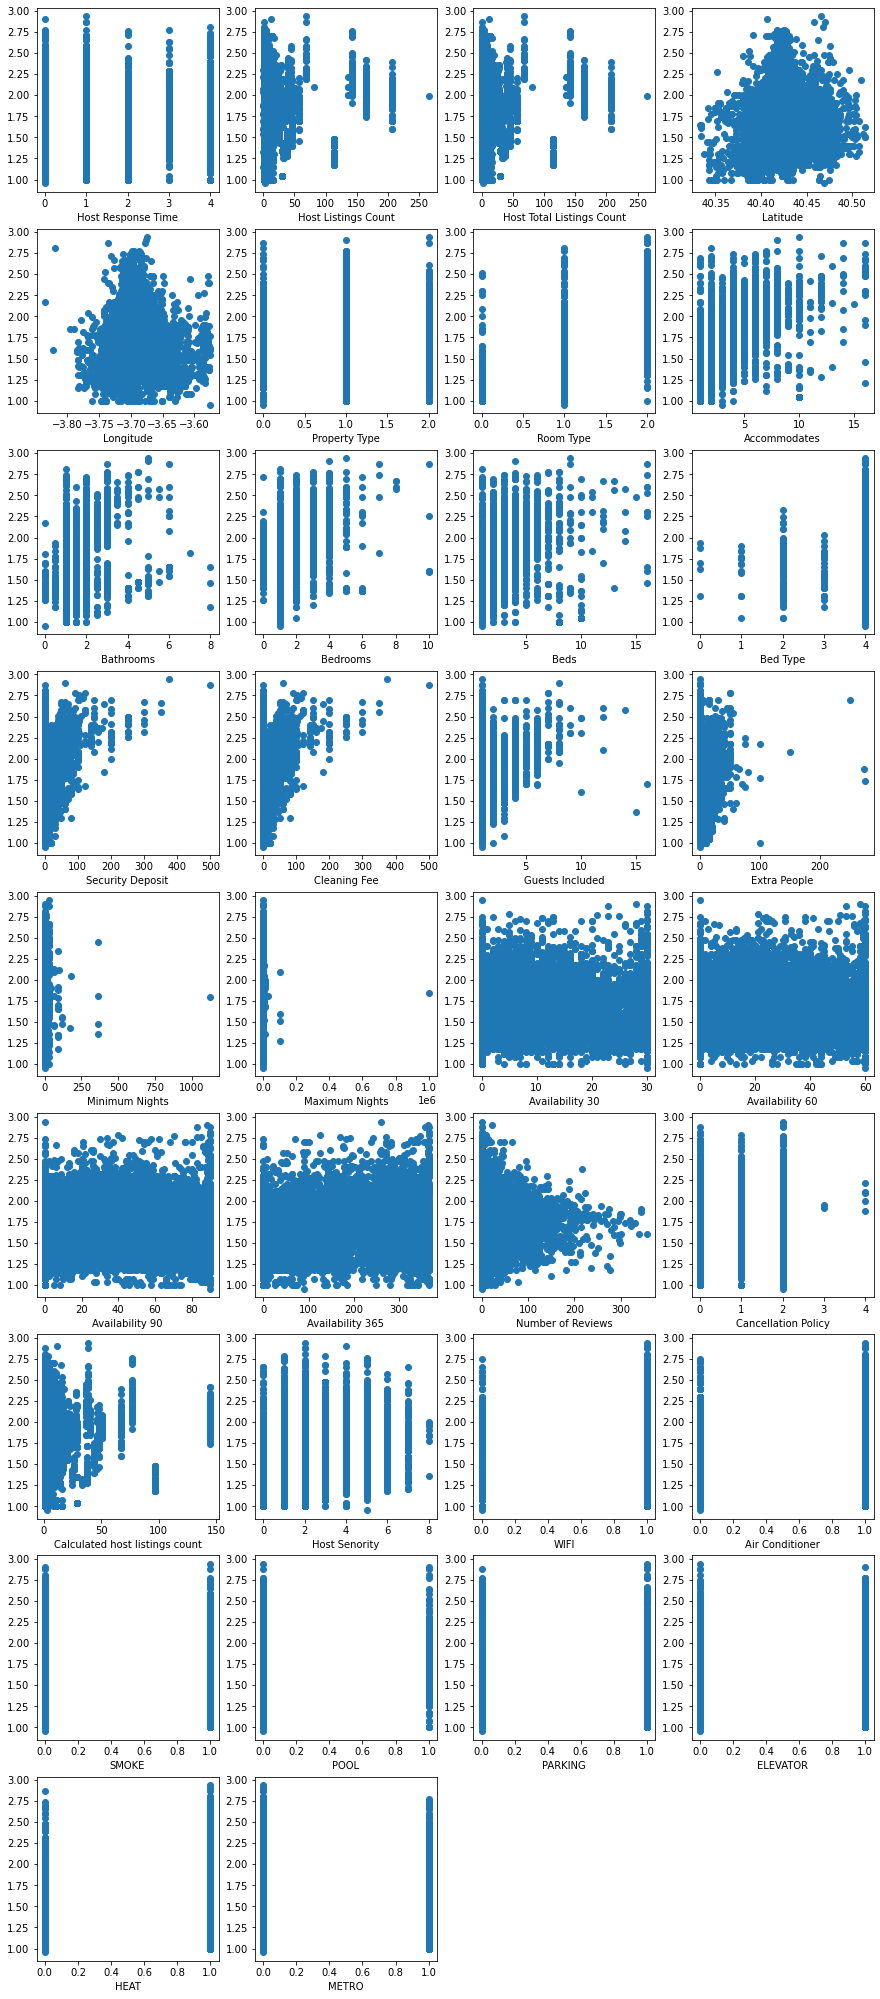

In [118]:
#Vamos a hacer scatter plot para ver si hay evidentes outliers:
scatter= pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True)
plt.figure(figsize=(15, 40))

c = 1
for d in X_train.describe().columns:

    plt.subplot(10,4,c)
    plt.scatter(scatter[d],scatter['Price'])

    plt.xlabel(d)
    c= c+1
    
plt.show()

In [119]:
#Minimunn Nigths y Maximun Nights parece que tiene outliers
#Eliminamos si Minimum Nights >400 y si Maximum Nights > 15000
print("Número de outlier eliminado de Minimun Night: " + str(len(X_train['Minimum Nights'].loc[(X_train['Minimum Nights'] > 400)])))
X_train['Minimum Nights']=X_train['Minimum Nights'].mask(X_train['Minimum Nights'] > 400)

print("Número de outlier eliminado de Maximun Night: " + str(len(X_train['Maximum Nights'].loc[(X_train['Maximum Nights'] > 15000)])))
X_train['Maximum Nights']=X_train['Maximum Nights'].mask(X_train['Maximum Nights'] > 15000)


#Extra people parece que también tiene ouliers
print("Número de outlier eliminado de Extra People Price: " + str(len(X_train['Extra People'].loc[(X_train['Extra People'] > 150)])))
X_train['Extra People']=X_train['Extra People'].mask(X_train['Extra People'] > 150)

Número de outlier eliminado de Minimun Night: 1
Número de outlier eliminado de Maximun Night: 6
Número de outlier eliminado de Extra People Price: 4


In [37]:
#Histogramas

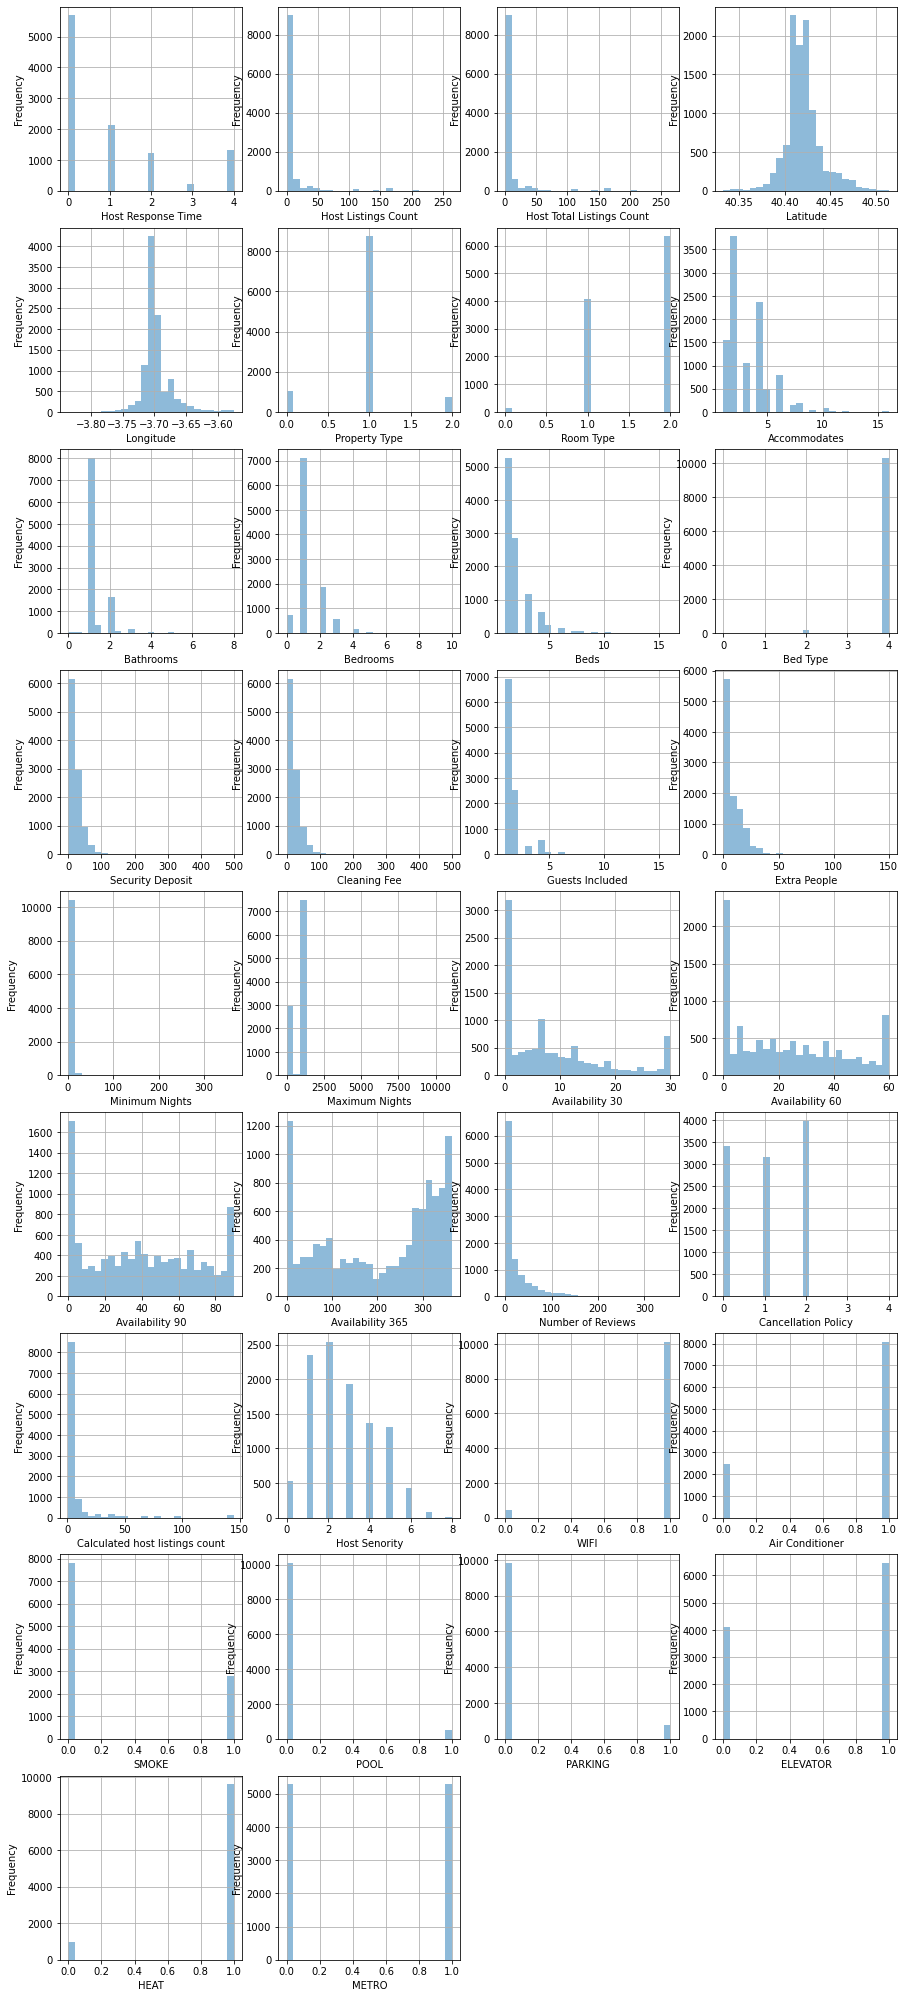

In [120]:
plt.figure(figsize=(15, 40))

c = 1
for d in X_train.describe().columns:

    plt.subplot(10,4,c)   
    X_train[d].plot.hist(alpha=0.5, bins=25, grid = True)
    plt.xlabel(d)
    c= c+1
    
plt.show()


Creamos además las siguientes variables para medir si hay demasiadas habitaciones en un apartamento o si meten demasiadas personas por apartamento.

In [121]:

X_train['Bath/Bedrooms'] = X_train['Bathrooms']*X_train['Bedrooms']
X_train['Accommodates/Bedrooms'] = X_train['Accommodates']*X_train['Bedrooms']

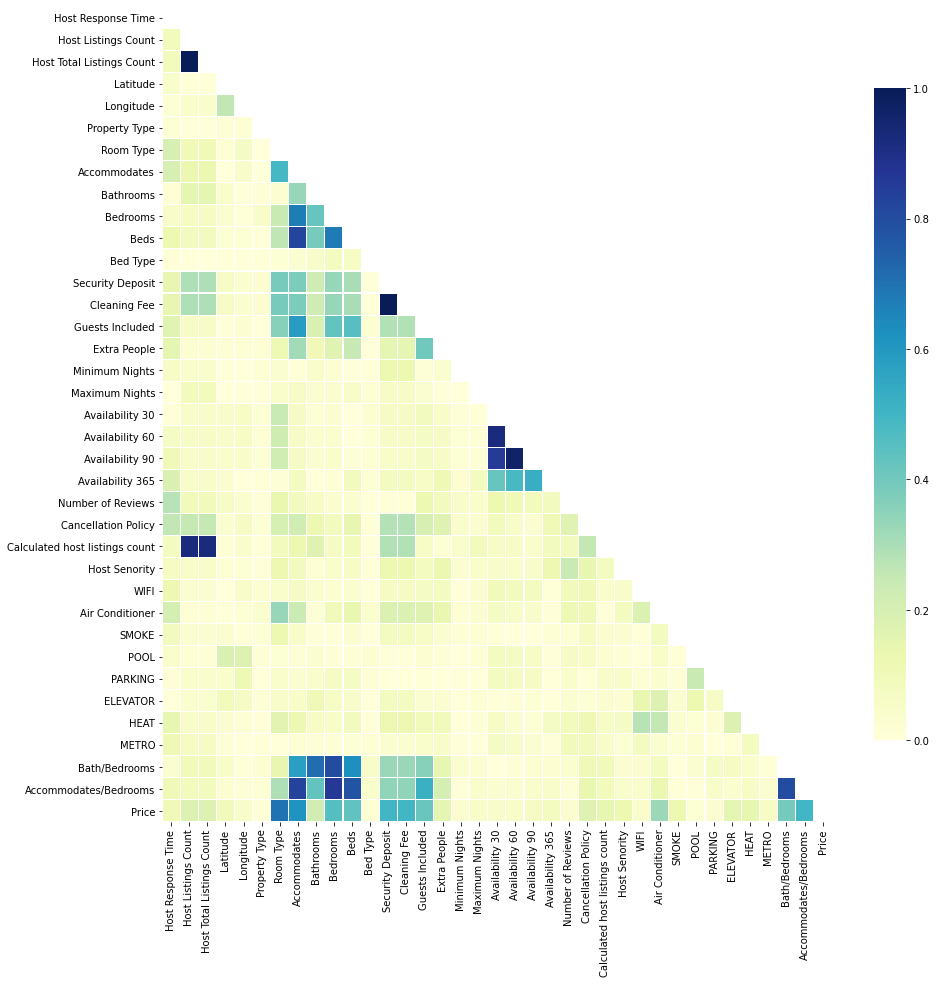

In [122]:
#Matriz de correlación
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Ya veíamos en los histogramas que Host Listings Count y Host Total Listings Count parecían iguales. En la matriz de correlaciones, podemos ver que la correlación entre ellas es prácticamente 1. También vemos el mismo resultado  con Calculated host listings coun. Eliminamos dos de ellas.

In [123]:
X_train = X_train.drop(['Host Total Listings Count','Host Listings Count'],axis= 1)

Availability 60 Availability 90, tienen una correlación también muy alta, eliminamos una de ellas

In [124]:
X_train = X_train.drop(['Availability 90','Availability 60'],axis= 1)

Eliminamos también Beds que está muy correlacionado con Accommodates

In [125]:
X_train = X_train.drop(['Beds'],axis= 1)

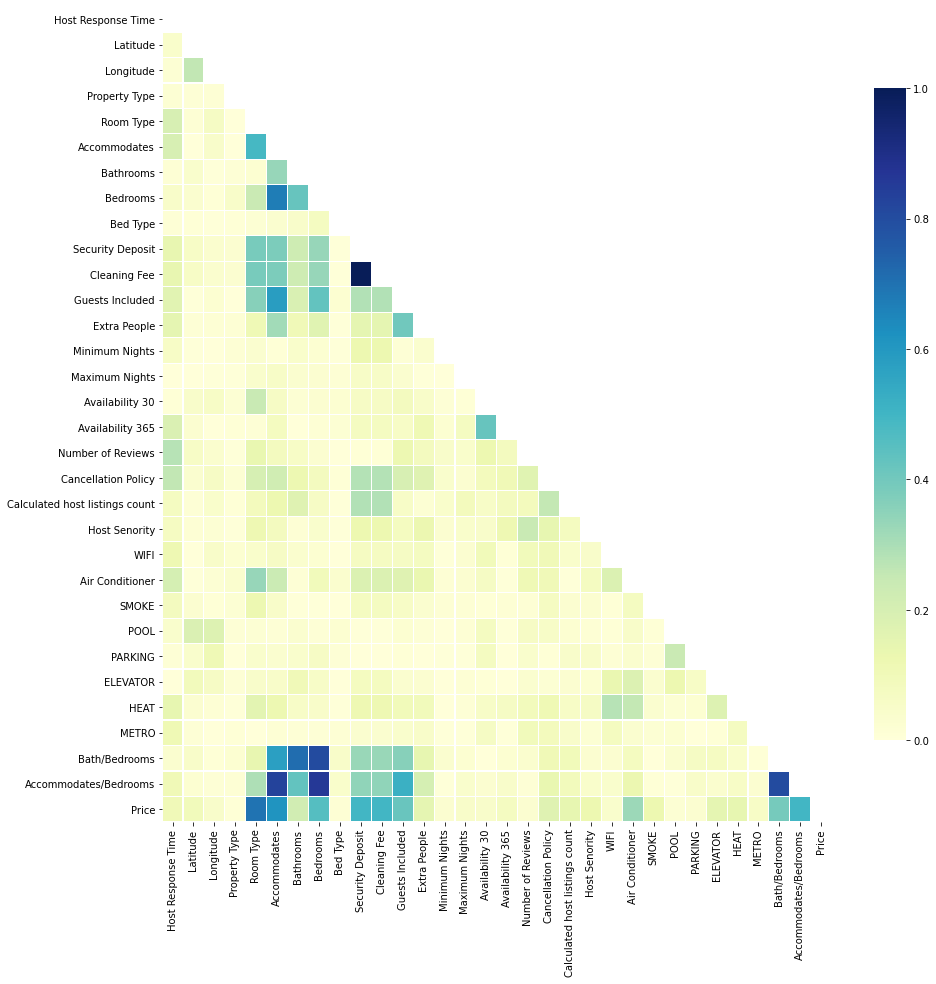

In [126]:
#Repetimos la matriz de correlación
corr = np.abs(pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Security Deposit y Cleaning Fee tienen mucha correlación a pesar de que por definición no parece que tengan relacion, tal vez por que cuando no hay de Security Deposit tampoco hay Cleaning Fee, la vamos a mantener de momento.

También vemos mucha correlación entre Accommodares/Bedrooms y Accomodates, ya que la hemos creado como ratio de la misma, y ocurre lo mismo con Bedrooms, y con la otra variable que hemos creado Bath/Bedrooms, las vamos a mantener también por el momento.

In [ ]:
#Seguimos teniendo un número muy elevado de variables,vamos a estudiar las variables más relevantes

In [ ]:
#Eliminamos las filas con NAN

In [127]:
Data = pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True)
Data = Data.dropna()
y_train = Data['Price']
X_train = Data.drop(['Price'],axis = 1)

In [ ]:
#Vamos a hacer todas las transformaciones que hemos hecho en train a test para tener el dataset listo

In [128]:
y_test = np.log10(y_test)

X_test= X_test.drop(['Name', 'Summary', 'Space', 'Description','Neighborhood Overview','Access','Notes','Interaction','House Rules','Host Location','Host About','Host Acceptance Rate',
'Host Neighbourhood','Host Verifications','Neighbourhood Cleansed','Street','Smart Location','Country Code','Calendar Updated',
'Has Availability','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Geolocation','Features'],axis= 1)

X_test['Cancellation Policy'].loc[X_test['Cancellation Policy']=='flexible_new']='flexible'
X_test['Cancellation Policy'].loc[X_test['Cancellation Policy']=='moderate_new']='moderate'
X_test['Cancellation Policy'].loc[X_test['Cancellation Policy']=='strict_new']='strict'
X_test['Cancellation Policy'] = encoder_cancellation_policy.transform(X_test[['Cancellation Policy']])

X_test['Bed Type'] = encoder_Bed_Type .transform(X_test[['Bed Type']])
X_test['Room Type'] = encoder_room_type.transform(X_test[['Room Type']])


X_test['WIFI']=((X_test['Amenities'].str.upper().str.contains('WIRELESS'))*1).fillna(0).astype(int)
X_test['Air Conditioner']=((X_test['Amenities'].str.upper().str.contains('AIR'))*1).fillna(0).astype(int)
X_test['SMOKE']=((X_test['Amenities'].str.upper().str.contains('SMOKING ALLOWED'))*1).fillna(0).astype(int)
X_test['POOL']=((X_test['Amenities'].str.upper().str.contains('POOL'))*1).fillna(0).astype(int)
X_test['PARKING']=((X_test['Amenities'].str.upper().str.contains('PARKING'))*1).fillna(0).astype(int)
X_test['ELEVATOR']=((X_test['Amenities'].str.upper().str.contains('ELEVATOR'))*1).fillna(0).astype(int)
X_test['HEAT']=((X_test['Amenities'].str.upper().str.contains('HEAT'))*1).fillna(0).astype(int)
#X_train['HEAT']=(X_train['Amenities'].str.upper().str.contains('HEAT', regex=False)== 'true')*1
X_test['METRO'] = ((X_test['Transit'].str.upper().str.contains('METRO'))*1).fillna(0).astype(int)




/home/lorenamh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [129]:
X_test['Host Response Time']= X_test['Host Response Time'].fillna("NULO")
X_test['Host Response Time'] = encoder_host_response_time.transform(X_test[['Host Response Time']])
X_test['Host Senority'] = (X_test[['Host Since']].apply(pd.to_datetime))
X_test['Host Senority'] =2017-X_test['Host Senority'].apply(lambda x: x.year)

X_test['Property Type'].loc[((X_test['Property Type']=='Apartment') |(X_test['Property Type']=='House') ) ==False] = 'Other' 
X_test['Property Type'] = encoder_Property_Type .transform(X_test[['Property Type']])

/home/lorenamh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [130]:
X_test = X_test[X_test['City']=='Madrid']

In [131]:
X_test = X_test.drop(['Neighbourhood Group Cleansed'],axis=1)

In [132]:
X_test = X_test.drop(['Host Since', 'Amenities','Transit','Experiences Offered','Neighbourhood','City','Country',
                       'State','Zipcode','Market'],axis = 1)

X_test['Cleaning Fee']=X_test['Cleaning Fee'].fillna(0)
X_test['Security Deposit'] = X_test['Cleaning Fee'].fillna(0)
X_test = X_test.drop(['Host Response Rate' ,'Square Feet','Review Scores Rating','Review Scores Accuracy',
                       'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
                       'Review Scores Location','Reviews per Month',
                       'Weekly Price','Monthly Price','Review Scores Value'],axis= 1)

X_test['Extra People']=X_test['Extra People'].mask(X_test['Extra People'] > 150)
X_test['Minimum Nights']=X_test['Minimum Nights'].mask(X_test['Minimum Nights'] > 400)
X_test['Maximum Nights']=X_test['Maximum Nights'].mask(X_test['Maximum Nights'] > 15000)



X_test['Bath/Bedrooms'] = X_test['Bathrooms']*X_test['Bedrooms']
X_test['Accommodates/Bedrooms'] = X_test['Accommodates']*X_test['Bedrooms']

X_test = X_test.drop(['Host Total Listings Count','Host Listings Count'],axis= 1)

X_test = X_test.drop(['Availability 90','Availability 60'],axis= 1)
X_test = X_test.drop(['Beds'],axis= 1)


In [133]:
X_test.shape[0]

2640

In [134]:
Data = pd.merge(X_test,pd.DataFrame(y_test), left_index=True, right_index=True)
Data = Data.dropna()
y_test = Data['Price']
X_test = Data.drop(['Price'],axis = 1)

In [135]:
X_test.shape[0]

2623

Voy a estudiar la selección de características con varios métodos para ver como se comportan y ver las diferencias.
Por otro lado, para ver que caso iría mejor para el modelo, voy a probar los modelos con la selección de características usando los distintos métodos.

In [ ]:
#Vamos a ver que pasa con el método de filtrado mutual info.

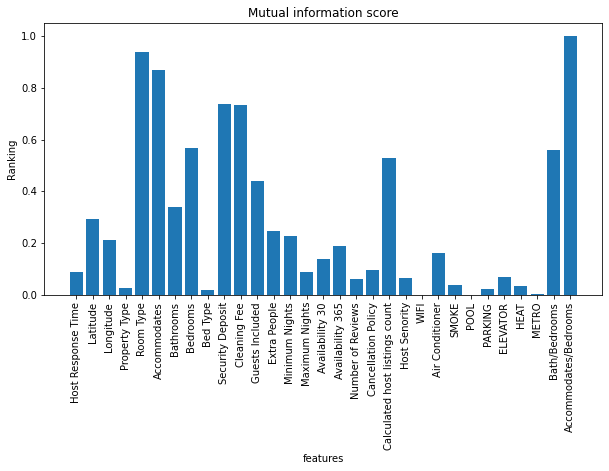

In [52]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)
feature_names = X_train.columns
# do some plotting

plt.figure(figsize=(10, 5))
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Voy a poner el corte en 0.2. Podemos ver que según este método las variables más importantes son el ratio entre Accommodates y bedrooms, room type y Accommodates.

In [53]:
MI_features = feature_names[mi>0.2]

In [ ]:
#Vamos a probar con Lasso para seleccionar caracteristicas

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.00018329807108324357 ....................................
[CV] ..................... alpha=0.00018329807108324357, total=   0.0s
[CV] alpha=0.00018329807108324357 ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... alpha=0.0006158482110660267, total=   0.0s
[CV] alpha=0.0006158482110660267 .....................................
[CV] ...................... alpha=0.0006158482110660267, total=   0.0s
[CV] alpha=0.0006158482110660267 .....................................
[CV] ...................... alpha=0.0006158482110660267, total=   0.0s
[CV] alpha=0.0006158482110660267 .....................................
[CV] ...................... alpha=0.0006158482110660267, total=   0.0s
[CV] alpha=0.0006158482110660267 .....................................
[CV] ...................... alpha=0.0006158482110660267, total=   0.0s
[CV] alpha=0.0011288378916846883 .....................................
[CV] ...................... alpha=0.0011288378916846883, total=   0.0s
[CV] alpha=0.0011288378916846883 .....................................
[CV] ...................... alpha=0.0011288378916846883, total=   0.0s
[CV] alpha=0.0011288378916846883 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


best mean cross-validation score: -0.028
best parameters: {'alpha': 0.0001}


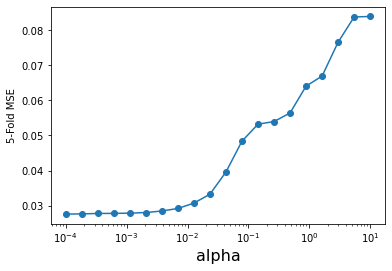

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-4,1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5,verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

Vemos que alpha converge a cero, entonces nos quedamos con el punto donde empieza a converger,0.0001, porque si tomamos cero nos quedamos con todas las variables.

In [55]:
from sklearn.metrics import mean_squared_error


alpha_optimo = grid.best_params_['alpha']

lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Lasso (train): 0.0273
MSE Modelo Lasso (test) : 0.0429
RMSE Modelo Lasso (train): 0.165
RMSE Modelo Lasso (test) : 0.207
Host Response Time 0.014045627794567387
Latitude 0.5071517078317664
Longitude -0.09934755811596728
Property Type -0.015157427395855115
Room Type 0.2814644346679555
Accommodates 0.034737956240049155
Bathrooms 0.030297298972383067
Bedrooms 0.04301094541767891
Bed Type 0.007366188197267017
Security Deposit 0.0018287555078235318
Cleaning Fee 0.0
Guests Included 0.011121282801940238
Extra People -0.00130218367381087
Minimum Nights -0.00047207995994976945
Maximum Nights 5.213374713629192e-06
Availability 30 0.0031436155031800395
Availability 365 5.3750620056140735e-05
Number of Reviews -0.0002025234796436875
Cancellation Policy -0.007500620079554041
Calculated host listings count 0.00016183340101431592
Host Senority 0.004893233799610344
WIFI -0.0047905173741861614
Air Conditioner 0.05295480973645752
SMOKE -0.02146338959242139
POOL 0.012923960144354844
PARKING -0

In [56]:
mseTrainModelLasso = mean_squared_error(10**y_train,10**ytrainLasso)
mseTestModelLasso = mean_squared_error(10**y_test,10**ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 1.67e+03
MSE Modelo Lasso (test) : 1.98e+03
RMSE Modelo Lasso (train): 40.9
RMSE Modelo Lasso (test) : 44.5


Con lasso vemos que prácticamente no eliminamos ninguna variable, solo Cleaning Fee,Maximum Nights,Availability 365  y HEAT.

In [54]:

Lasso_features = X_train.columns
Lasso_features=Lasso_features.drop(['Cleaning Fee','Maximum Nights','Availability 365','HEAT'])

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=1, score=0.387, total=   0.3s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.389, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.396, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.395, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.395, total=   0.2s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.538, total=   0.3s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.6s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.538, total=   0.4s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.550, total=   0.4s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.546, total=   0.4s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.7s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.544, total=   0.3s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.600, total=   0.4s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.599, total=   0.4s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.613, total=   0.4s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.609, total=   0.4s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.609, total=   0.4s
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.643, total=   0.5s
[CV] max_depth=4 .....................................................
[CV] .

[CV] ........................ max_depth=14, score=0.784, total=   1.4s
[CV] max_depth=14 ....................................................
[CV] ........................ max_depth=14, score=0.777, total=   1.4s
[CV] max_depth=14 ....................................................
[CV] ........................ max_depth=14, score=0.784, total=   1.4s
[CV] max_depth=15 ....................................................
[CV] ........................ max_depth=15, score=0.783, total=   1.5s
[CV] max_depth=15 ....................................................
[CV] ........................ max_depth=15, score=0.780, total=   1.5s
[CV] max_depth=15 ....................................................
[CV] ........................ max_depth=15, score=0.787, total=   1.6s
[CV] max_depth=15 ....................................................
[CV] ........................ max_depth=15, score=0.780, total=   1.6s
[CV] max_depth=15 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  1.7min finished


best mean cross-validation score: 0.789
best parameters: {'max_depth': 19}


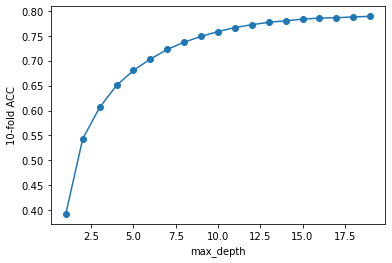

In [57]:

#Vamos a probar con modelo que nos permita ver la importancia de las variables. Por ejemplo con un randomforest
#maxDepthOptimo = grid.best_params_['max_depth']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5,verbose = 10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

    


In [ ]:
#Voy a cortar en 9 que parece que es donde comienza a ser más plano

In [58]:
maxDepthOptimo = 9
N,Nfeatures = X_train.shape

rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train.iloc[idxTrain,:]
        yt = y_train.iloc[idxTrain]
        Xv = X_train.iloc[idxVal,:]
        yv = y_train.iloc[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt.iloc[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv.iloc[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.5031135286038126 +/- 0.018992888562261105
# features 2 error 0.3873174904990212 +/- 0.019184916545360704
# features 3 error 0.37664852945906413 +/- 0.023578889387976275
# features 4 error 0.3552865299984158 +/- 0.029458395979391455
# features 5 error 0.3327270142922728 +/- 0.02061302248042809
# features 6 error 0.322722213686549 +/- 0.022124040456180074
# features 7 error 0.3166004078125537 +/- 0.020289156489589694
# features 8 error 0.2941209979738969 +/- 0.021961119277033796
# features 9 error 0.29186900139677563 +/- 0.021425842331634328
# features 10 error 0.29080393400531157 +/- 0.02206210345883856
# features 11 error 0.2839314458039955 +/- 0.020773596782428017
# features 12 error 0.27694042233223864 +/- 0.022904799243609764
# features 13 error 0.26467077420341373 +/- 0.022084041208109802
# features 14 error 0.2533683734961675 +/- 0.019446038868411612
# features 15 error 0.251873837276245 +/- 0.018937318816116214
# features 16 error 0.2463801472698794 +/- 0.018

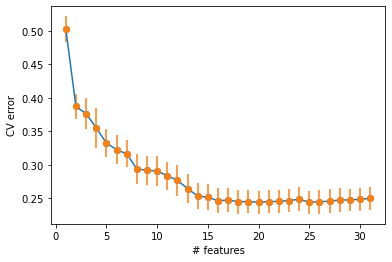

In [59]:
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

Nos vamos a quedar con 14 variables, que a partir de ahí la curva es totalmente plana.

In [60]:

RandomForest_features =X_train.columns[indices[:14]]
RandomForest_features

Index(['Room Type', 'Accommodates', 'Accommodates/Bedrooms', 'Bedrooms',
       'Security Deposit', 'Bath/Bedrooms', 'Cleaning Fee', 'Latitude',
       'Bathrooms', 'Guests Included', 'Longitude', 'Extra People',
       'Air Conditioner', 'Availability 30'],
      dtype='object')

In [ ]:
#Variables importantes según distintos metodos:

In [63]:
# 1. mutual_info_regression
MI_features

Index(['Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Calculated host listings count',
       'Bath/Bedrooms', 'Accommodates/Bedrooms'],
      dtype='object')

In [64]:
# 2. Lasso
Lasso_features 

Index(['Host Response Time', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Security Deposit', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Host Senority', 'WIFI',
       'Air Conditioner', 'SMOKE', 'POOL', 'PARKING', 'ELEVATOR', 'METRO',
       'Bath/Bedrooms', 'Accommodates/Bedrooms'],
      dtype='object')

In [65]:
# 3. Importancia de las variables según RandomForest
RandomForest_features 

Index(['Room Type', 'Accommodates', 'Accommodates/Bedrooms', 'Bedrooms',
       'Cleaning Fee', 'Bath/Bedrooms', 'Security Deposit', 'Latitude',
       'Bathrooms', 'Guests Included', 'Air Conditioner', 'Longitude',
       'Extra People', 'Availability 30'],
      dtype='object')

In [477]:
#Modelos

Voy a ver como se comportan los modelos con los distintos métodos de selección de características.

In [538]:
##1. Árbol de regresión 

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] .

[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] .

[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.5s finished


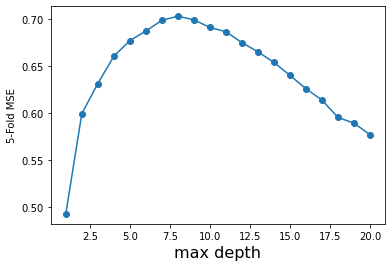

In [66]:
# 1.1 con MI_features
from sklearn.tree import DecisionTreeRegressor
max_depth = list(range(1, 21))
param_grid = {'max_depth': max_depth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train[MI_features], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()


Train:  0.7502280762720611
Test:  0.6820071303232883
RMSE Modelo (train): 30.5
RMSE Modelo (test) : 37.9


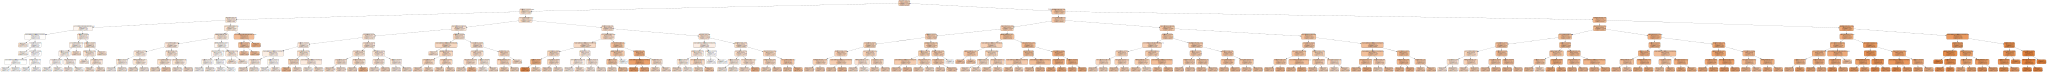

In [67]:
#Me quedo con el óptimo que da Gridsearch
ModelTree_MI = DecisionTreeRegressor(max_depth=grid.best_params_['max_depth'])
ModelTree_MI.fit(X_train[MI_features], y_train)
ytrain_ModelTree_MI = ModelTree_MI.predict(X_train[MI_features])
ytestLasso_ModelTree_MI  = ModelTree_MI.predict(X_test[MI_features])

print("Train: ",ModelTree_MI.score(X_train[MI_features],y_train))
print("Test: ",ModelTree_MI.score(X_test[MI_features],y_test))

mseTrain = mean_squared_error(10**y_train,10**ytrain_ModelTree_MI)
mseTest = mean_squared_error(10**y_test,10**ytestLasso_ModelTree_MI  )


print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(ModelTree_MI, out_file=None, 
                         feature_names=MI_features,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] .

[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] .

[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.1s
[CV] max_depth=15 ....................................................
[CV] .

[CV] ..................................... max_depth=20, total=   0.1s
best mean cross-validation score: 0.707
best parameters: {'max_depth': 8}


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.2s finished


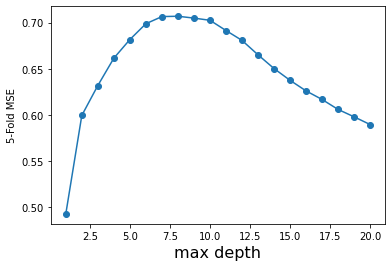

In [68]:
# 1.2 con Lasso
from sklearn.tree import DecisionTreeRegressor
max_depth = list(range(1, 21))
param_grid = {'max_depth': max_depth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train[Lasso_features], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [69]:
#Me quedo con el óptimo de Gridsearch
ModelTree_Lasso = DecisionTreeRegressor(max_depth=grid.best_params_['max_depth'])
ModelTree_Lasso.fit(X_train[Lasso_features], y_train)
ytrain_ModelTree_Lasso = ModelTree_Lasso.predict(X_train[Lasso_features])
ytestLasso_ModelTree_Lasso = ModelTree_Lasso.predict(X_test[Lasso_features])

print("Train: ",ModelTree_Lasso.score(X_train[Lasso_features],y_train))
print("Test: ",ModelTree_Lasso.score(X_test[Lasso_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_ModelTree_Lasso)
mseTest = mean_squared_error(10**y_test,10**ytestLasso_ModelTree_Lasso )
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))


Train:  0.7760961171974938
Test:  0.7044102381551376
RMSE Modelo (train): 28.8
RMSE Modelo (test) : 36.5


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] .

[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] .

[CV] ..................................... max_depth=15, total=   0.0s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.0s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.0s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.0s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.0s
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] ..................................... max_depth=16, total=   0.0s
[CV] max_depth=16 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished


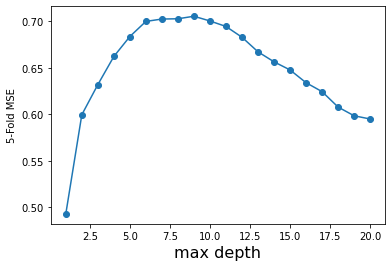

In [70]:
# 1.3 selección con RandomForest
from sklearn.tree import DecisionTreeRegressor
max_depth = list(range(1, 21))
param_grid = {'max_depth': max_depth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train[RandomForest_features], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [71]:
#En este caso no vamos a coger el óptimo que obtenemos con GridSearch, nos quedamos con 7 porque en 8 hace un movimiento raro

ModelTree_Random = DecisionTreeRegressor(max_depth=7)
ModelTree_Random.fit(X_train[RandomForest_features], y_train)
ytrain_ModelTree_Random = ModelTree_Random .predict(X_train[RandomForest_features])
ytest_ModelTree_Random  = ModelTree_Random .predict(X_test[RandomForest_features])

print("Train: ",ModelTree_Random.score(X_train[RandomForest_features],y_train))
print("Test: ",ModelTree_Random.score(X_test[RandomForest_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_ModelTree_Random)
mseTest = mean_squared_error(10**y_test,10**ytest_ModelTree_Random)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.7451815372026969
Test:  0.7042648152754154
RMSE Modelo (train): 31.7
RMSE Modelo (test) : 35.1


Con la selección de característica de Lasso parece que en train se ajusta mejor, pero luego vemos que en test el resto de modelos son parecidos, tal vez merezca la pena reducir la complejidad del modelo.

In [ ]:
##2. Random Forest

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] .

[CV] ...................................... max_depth=6, total=   0.7s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] .

[CV] ..................................... max_depth=12, total=   1.3s
[CV] max_depth=12 ....................................................
[CV] ..................................... max_depth=12, total=   1.5s
[CV] max_depth=12 ....................................................
[CV] ..................................... max_depth=12, total=   1.2s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.4s
[CV] max_depth=13 ....................................................
[CV] .

[CV] ..................................... max_depth=18, total=   1.6s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.6s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.6s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.6s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.6s
[CV] max_depth=19 ....................................................
[CV] ..................................... max_depth=19, total=   1.7s
[CV] max_depth=19 ....................................................
[CV] ..................................... max_depth=19, total=   1.6s
[CV] max_depth=19 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  3.3min finished


best mean cross-validation score: 0.767
best parameters: {'max_depth': 19}


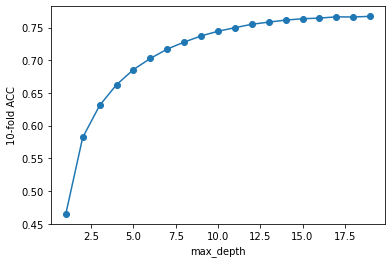

In [72]:
#2.1 MI

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=2) 
grid.fit(X_train[MI_features], y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [73]:
#En este caso vamos a cortar en 10 
maxDepthOptimo = 10
RandomForestModel_MI = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train[MI_features],y_train)

ytrain_RandomForestModel_MI= RandomForestModel_MI.predict(X_train[MI_features])
ytest_RandomForestModel_MI= RandomForestModel_MI.predict(X_test[MI_features])
print("Train: ",RandomForestModel_MI.score(X_train[MI_features],y_train))
print("Test: ",RandomForestModel_MI.score(X_test[MI_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_RandomForestModel_MI)
mseTest = mean_squared_error(10**y_test,10**ytest_RandomForestModel_MI)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.7960016860850088
Test:  0.7328598448472505
RMSE Modelo (train): 29.8
RMSE Modelo (test) : 35.3


Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] .

[CV] ...................................... max_depth=6, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   1.0s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] .

[CV] ..................................... max_depth=12, total=   1.4s
[CV] max_depth=12 ....................................................
[CV] ..................................... max_depth=12, total=   1.5s
[CV] max_depth=12 ....................................................
[CV] ..................................... max_depth=12, total=   1.5s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.6s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.6s
[CV] max_depth=13 ....................................................
[CV] .

[CV] ..................................... max_depth=18, total=   2.3s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   2.4s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   2.0s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   2.1s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   2.1s
[CV] max_depth=19 ....................................................
[CV] ..................................... max_depth=19, total=   2.2s
[CV] max_depth=19 ....................................................
[CV] ..................................... max_depth=19, total=   2.2s
[CV] max_depth=19 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  4.0min finished


best mean cross-validation score: 0.792
best parameters: {'max_depth': 19}


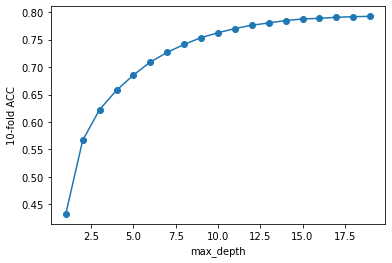

In [74]:
#2.2 Lasso
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=2) 
grid.fit(X_train[Lasso_features], y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [75]:
#Cortamos en 10 también
maxDepthOptimo = 10
RandomForestModel_Lasso = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train[Lasso_features],y_train)

ytrain_RandomForestModel_Lasso= RandomForestModel_Lasso.predict(X_train[Lasso_features])
ytest_RandomForestModel_Lasso= RandomForestModel_Lasso.predict(X_test[Lasso_features])
print("Train: ",RandomForestModel_Lasso.score(X_train[Lasso_features],y_train))
print("Test: ",RandomForestModel_Lasso.score(X_test[Lasso_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_RandomForestModel_Lasso)
mseTest = mean_squared_error(10**y_test,10**ytest_RandomForestModel_Lasso)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8242174713399711
Test:  0.7521302136056797
RMSE Modelo (train): 28.6
RMSE Modelo (test) : 34.9


Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.3s
[CV] max_depth=1 .....................................................
[CV] .

[CV] ...................................... max_depth=6, total=   0.8s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=7, total=   0.9s
[CV] max_depth=7 .....................................................
[CV] .

[CV] ..................................... max_depth=12, total=   1.2s
[CV] max_depth=12 ....................................................
[CV] ..................................... max_depth=12, total=   1.2s
[CV] max_depth=12 ....................................................
[CV] ..................................... max_depth=12, total=   1.2s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] ..................................... max_depth=13, total=   1.3s
[CV] max_depth=13 ....................................................
[CV] .

[CV] ..................................... max_depth=18, total=   1.7s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.8s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.7s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   1.7s
[CV] max_depth=18 ....................................................
[CV] ..................................... max_depth=18, total=   2.0s
[CV] max_depth=19 ....................................................
[CV] ..................................... max_depth=19, total=   1.9s
[CV] max_depth=19 ....................................................
[CV] ..................................... max_depth=19, total=   1.7s
[CV] max_depth=19 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  3.4min finished


best mean cross-validation score: 0.778
best parameters: {'max_depth': 19}


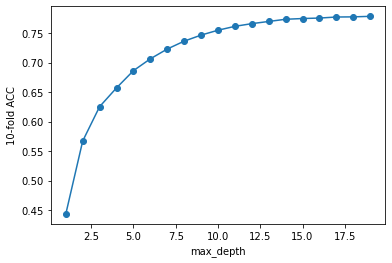

In [78]:
#2.3 Ramdom
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=2) 
grid.fit(X_train[RandomForest_features], y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [79]:
#Cortamos en 10.
maxDepthOptimo = 10
RandomForestModel_RandomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train[RandomForest_features],y_train)

ytrain_RandomForestModel_RandomForest= RandomForestModel_RandomForest.predict(X_train[RandomForest_features])
ytest_RandomForestModel_RandomForest= RandomForestModel_RandomForest.predict(X_test[RandomForest_features])
print("Train: ",RandomForestModel_RandomForest.score(X_train[RandomForest_features],y_train))
print("Test: ",RandomForestModel_RandomForest.score(X_test[RandomForest_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_RandomForestModel_RandomForest)
mseTest = mean_squared_error(10**y_test,10**ytest_RandomForestModel_RandomForest)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8099788226470729
Test:  0.7441111047993338
RMSE Modelo (train): 28.8
RMSE Modelo (test) : 34.6


Parece que randomforest mejora los resultados del árbol de decisión. Parece que con las características de Lasso se ajusta en train un poco mejor que con el resto, también en test pero la diferencia es menor.

In [ ]:
# 3. Bagging

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] base_estimator__max_depth=1 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... base_estimator__max_depth=1, total=   0.5s
[CV] base_estimator__max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...................... base_estimator__max_depth=1, total=   0.5s
[CV] base_estimator__max_depth=1 .....................................
[CV] ...................... base_estimator__max_depth=1, total=   0.5s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   0.8s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   0.9s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   0.8s
[CV] base_estimator__max_depth=3 .....................................
[CV] ...................... base_estimator__max_depth=3, total=   1.0s
[CV] base_estimator__max_depth=3 .....................................
[CV] ...................... base_estimator__max_depth=3, total=   1.0s
[CV] base_estimator__max_depth=3 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.6min finished


best mean cross-validation score: 0.753
best parameters: {'base_estimator__max_depth': 17}


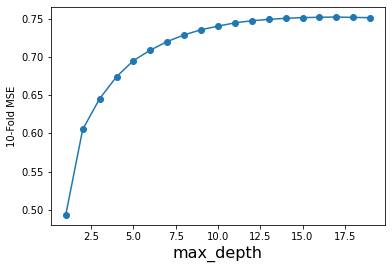

In [80]:
# 3.1 MI
from sklearn.ensemble import BaggingRegressor
maxDepth = range(1,20)
#param_grid = {'max_depth': maxDepth } #--> Esto falla
param_grid = {'base_estimator__max_depth': maxDepth }
grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200, random_state=0), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train[MI_features], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [ ]:
#Tiene una pinta similar que random forest, vamos a cortar en 10

In [81]:
maxDepthOptimo = 10
ModelBagging_MI = BaggingRegressor(DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200).fit(X_train[MI_features],y_train)

ytrain_ModelBagging_MI= ModelBagging_MI.predict(X_train[MI_features])
ytest_ModelBagging_MI= ModelBagging_MI.predict(X_test[MI_features])
print("Train: ",ModelBagging_MI.score(X_train[MI_features],y_train))
print("Test: ",ModelBagging_MI.score(X_test[MI_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_ModelBagging_MI)
mseTest = mean_squared_error(10**y_test,10**ytest_ModelBagging_MI)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8182051567985843
Test:  0.736643086830659
RMSE Modelo (train): 27.8
RMSE Modelo (test) : 34.6


Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] base_estimator__max_depth=1 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... base_estimator__max_depth=1, total=   0.6s
[CV] base_estimator__max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... base_estimator__max_depth=1, total=   0.6s
[CV] base_estimator__max_depth=1 .....................................
[CV] ...................... base_estimator__max_depth=1, total=   0.6s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   1.0s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   1.0s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   1.0s
[CV] base_estimator__max_depth=3 .....................................
[CV] ...................... base_estimator__max_depth=3, total=   1.4s
[CV] base_estimator__max_depth=3 .....................................
[CV] ...................... base_estimator__max_depth=3, total=   1.4s
[CV] base_estimator__max_depth=3 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  3.8min finished


best mean cross-validation score: 0.780
best parameters: {'base_estimator__max_depth': 19}


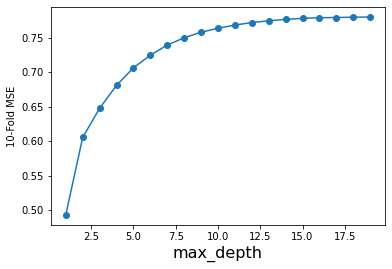

In [82]:
# 3.2 Lasso

maxDepth = range(1,20)
#param_grid = {'max_depth': maxDepth } #--> Esto falla
param_grid = {'base_estimator__max_depth': maxDepth }
grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200, random_state=0), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train[Lasso_features], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [84]:
maxDepthOptimo = 10
ModelBagging_Lasso = BaggingRegressor(DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200).fit(X_train[Lasso_features],y_train)

ytrain_ModelBagging_Lasso= ModelBagging_Lasso.predict(X_train[Lasso_features])
ytest_ModelBagging_Lasso= ModelBagging_Lasso.predict(X_test[Lasso_features])
print("Train: ",ModelBagging_Lasso.score(X_train[Lasso_features],y_train))
print("Test: ",ModelBagging_Lasso.score(X_test[Lasso_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_ModelBagging_Lasso)
mseTest = mean_squared_error(10**y_test,10**ytest_ModelBagging_Lasso)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8509771505715262
Test:  0.76140876770792
RMSE Modelo (train): 25
RMSE Modelo (test) : 33.6


Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] base_estimator__max_depth=1 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... base_estimator__max_depth=1, total=   0.4s
[CV] base_estimator__max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...................... base_estimator__max_depth=1, total=   0.4s
[CV] base_estimator__max_depth=1 .....................................
[CV] ...................... base_estimator__max_depth=1, total=   0.5s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   0.7s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   0.7s
[CV] base_estimator__max_depth=2 .....................................
[CV] ...................... base_estimator__max_depth=2, total=   0.7s
[CV] base_estimator__max_depth=3 .....................................
[CV] ...................... base_estimator__max_depth=3, total=   0.9s
[CV] base_estimator__max_depth=3 .....................................
[CV] ...................... base_estimator__max_depth=3, total=   1.0s
[CV] base_estimator__max_depth=3 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.5min finished


best mean cross-validation score: 0.761
best parameters: {'base_estimator__max_depth': 15}


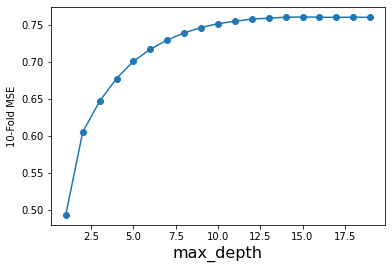

In [85]:
# 3.2 Random
maxDepth = range(1,20)
#param_grid = {'max_depth': maxDepth } #--> Esto falla
param_grid = {'base_estimator__max_depth': maxDepth }
grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200, random_state=0), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train[RandomForest_features], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [86]:
maxDepthOptimo = 10
ModelBagging_RandomForest = BaggingRegressor(DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200).fit(X_train[RandomForest_features],y_train)

ytrain_ModelBagging_RandomForest= ModelBagging_RandomForest.predict(X_train[RandomForest_features])
ytest_ModelBagging_RandomForest= ModelBagging_RandomForest.predict(X_test[RandomForest_features])
print("Train: ",ModelBagging_RandomForest.score(X_train[RandomForest_features],y_train))
print("Test: ",ModelBagging_RandomForest.score(X_test[RandomForest_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_ModelBagging_RandomForest)
mseTest = mean_squared_error(10**y_test,10**ytest_ModelBagging_RandomForest)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8351633002002751
Test:  0.7521762209743159
RMSE Modelo (train): 26.4
RMSE Modelo (test) : 33.6


Hemos cortado en 10, como en randomfores. Bagging mejora los resultados de randomforest tanto en train como en test.
Vemos además el mismo comportamiento que antes al coger distintas características. Con Lasso mejoran los resultados, pero parece que train y test se separan más.

In [70]:
# 4. Boosted
from sklearn.ensemble import GradientBoostingRegressor


2
Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.1s
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.1s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.1s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.1s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .

[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.3s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   0.4s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   0.5s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .

[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.3s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.4s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.5s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.5s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.6s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.6s
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] .

[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.4s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.4s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.4s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.4s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   0.6s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   0.6s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   0.6s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:  5.3min finished


4
Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.3s
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.3s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.3s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.3s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.3s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .

[CV] .............. learning_rate=0.05, n_estimators=25, total=   0.3s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.6s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   0.8s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .

[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.5s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.5s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.5s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   0.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .

[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   0.8s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   1.1s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   1.1s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 10.1min finished


6
Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.4s
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.4s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.4s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.4s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.4s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.8s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.8s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.8s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .

[CV] .............. learning_rate=0.05, n_estimators=25, total=   0.4s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.8s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.8s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.8s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.8s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   0.8s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   1.2s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .

[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.7s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.8s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .

[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.1s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.1s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.1s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.1s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.1s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   1.5s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   1.5s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 14.4min finished


8
Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.5s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .

[CV] .............. learning_rate=0.05, n_estimators=25, total=   0.5s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.0s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.0s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.0s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.0s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.0s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   1.5s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .

[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.0s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.0s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.0s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.5s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.6s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.5s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .

[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.5s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.6s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.7s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.6s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.6s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   2.1s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   2.2s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 19.1min finished


10
Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.6s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.2s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .

[CV] .............. learning_rate=0.05, n_estimators=25, total=   0.6s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.2s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.3s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.5s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   1.9s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .

[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.2s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.2s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.2s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   1.8s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .

[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.8s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   1.8s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   2.4s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   2.4s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 23.8min finished


12
Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.7s
[CV] learning_rate=0.1, n_estimators=25 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.7s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.8s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.9s
[CV] learning_rate=0.1, n_estimators=25 ..............................
[CV] ............... learning_rate=0.1, n_estimators=25, total=   0.8s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.5s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.4s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   1.4s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] .

[CV] .............. learning_rate=0.05, n_estimators=25, total=   0.8s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.8s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.6s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.5s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.7s
[CV] learning_rate=0.05, n_estimators=50 .............................
[CV] .............. learning_rate=0.05, n_estimators=50, total=   1.7s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .............. learning_rate=0.05, n_estimators=75, total=   2.2s
[CV] learning_rate=0.05, n_estimators=75 .............................
[CV] .

[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.4s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.4s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   1.4s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   2.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   2.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   2.1s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .............. learning_rate=0.01, n_estimators=75, total=   2.4s
[CV] learning_rate=0.01, n_estimators=75 .............................
[CV] .

[CV] ............. learning_rate=0.005, n_estimators=75, total=   2.1s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   2.1s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   2.2s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   2.3s
[CV] learning_rate=0.005, n_estimators=75 ............................
[CV] ............. learning_rate=0.005, n_estimators=75, total=   2.2s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   2.9s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] ............ learning_rate=0.005, n_estimators=100, total=   2.8s
[CV] learning_rate=0.005, n_estimators=100 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed: 27.7min finished


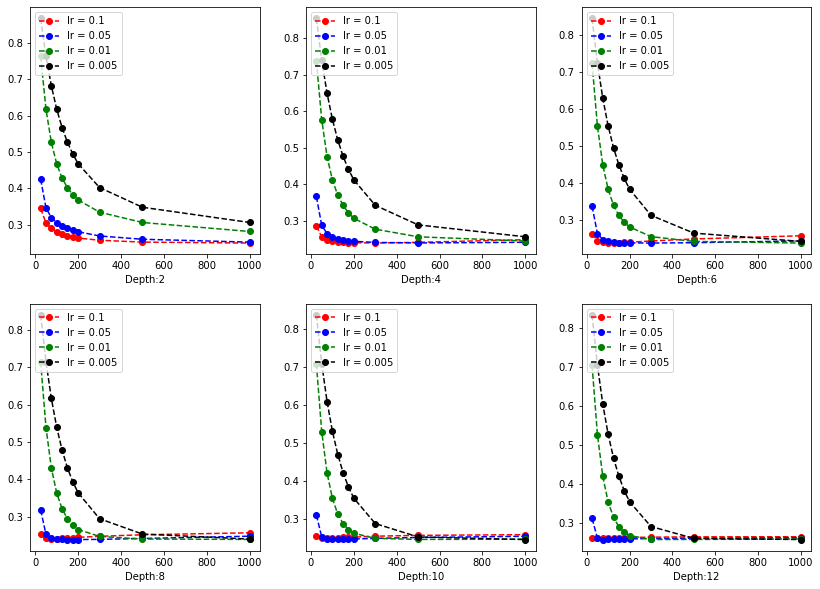

In [88]:
# 4.1 MI
Niterations = [25,50,75,100,125,150,175,200,300,500,1000]

learningRate = [0.1,0.05,0.01,0.005]
maxDepth = [2,4,6,8,10,12]

tuned_parameters = {'n_estimators': Niterations,'learning_rate':learningRate}
colors = ['r','b','g','k','m','o']
fig = plt.figure(figsize=(14,10))
n= 0
for d in maxDepth :
    print(d)
    n= n+1
    grid = GridSearchCV(GradientBoostingRegressor(random_state=0,max_depth=d), param_grid=tuned_parameters, cv = 5, verbose=2)
    grid.fit(X_train[MI_features], y_train)
    error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
    plt.subplot(2, 3, n)
    for i,lr in enumerate(learningRate):    
        plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr) 
        plt.legend(loc="upper left")
        plt.xlabel("Depth:"+str( d))
                     
                     

                
plt.show()                
                
#print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
#print("best parameters: {}".format(grid.best_params_))

Parece que no hay mucha diferencia en las gráficas entre la profundidad 8,10 y 12.La learning rate que mejor pinta tiene es la de color verde ( 0.01) ya que parece que converge antes que la 0.005 llegando finalmente al mismo nivel. Vamos a quedarnos con una profundidad de 6 para simplificar el modelo, ya que parece que converge al mismo nivel. Learning rate de 0.01 y 1000 iteraciones.

In [232]:
str(colors[i])+ str(lr)

'k0.01'

In [102]:
Depth = 6
lrOptimo = 0.01
neOptimo = 1000
Modelbt_MI = GradientBoostingRegressor(random_state=0, max_depth=Depth,learning_rate=lrOptimo, n_estimators=neOptimo)
Modelbt_MI.fit(X_train[MI_features],y_train)

ytrain_Modelbt_MI= Modelbt_MI.predict(X_train[MI_features])
ytest_Modelbt_MI= Modelbt_MI.predict(X_test[MI_features])
print("Train: ",Modelbt_MI.score(X_train[MI_features],y_train))
print("Test: ",Modelbt_MI.score(X_test[MI_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_Modelbt_MI)
mseTest = mean_squared_error(10**y_test,10**ytest_Modelbt_MI)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8451226201988077
Test:  0.757697458353868
RMSE Modelo (train): 25.9
RMSE Modelo (test) : 33.1


2
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .

[CV] ............. learning_rate=0.01, n_estimators=300, total=   2.8s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.4min finished


4
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   3.4s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   2.9s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   4.5s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   4.4s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   4.5s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .

[CV] ............. learning_rate=0.01, n_estimators=300, total=   5.1s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   7.5s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   8.2s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   7.4s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   8.0s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   7.4s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=  15.4s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 20.8min finished


6
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=200, total=   4.7s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=200, total=   4.5s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   4.6s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   4.9s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   4.6s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   7.2s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   6.8s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   6.7s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .

[CV] ............. learning_rate=0.01, n_estimators=300, total=   6.7s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  10.6s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  11.0s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  10.7s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  10.6s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  10.7s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=  22.2s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 30.0min finished


8
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=200, total=   5.9s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=200, total=   5.9s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   6.2s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   5.8s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   6.1s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   8.8s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   8.7s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=   9.2s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .

[CV] ............. learning_rate=0.01, n_estimators=300, total=   8.4s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  14.6s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  14.2s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  14.7s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  14.5s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  15.2s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=  28.8s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 39.8min finished


10
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=200, total=   7.7s
[CV] learning_rate=0.1, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=200, total=   7.7s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   7.3s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   7.3s
[CV] learning_rate=0.1, n_estimators=200 .............................
[CV] .............. learning_rate=0.1, n_estimators=200, total=   7.4s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=  11.7s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=  11.4s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .............. learning_rate=0.1, n_estimators=300, total=  11.5s
[CV] learning_rate=0.1, n_estimators=300 .............................
[CV] .

[CV] ............. learning_rate=0.01, n_estimators=300, total=  10.5s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  17.3s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  17.8s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  17.8s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  17.7s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=  17.9s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=  36.4s
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 49.8min finished


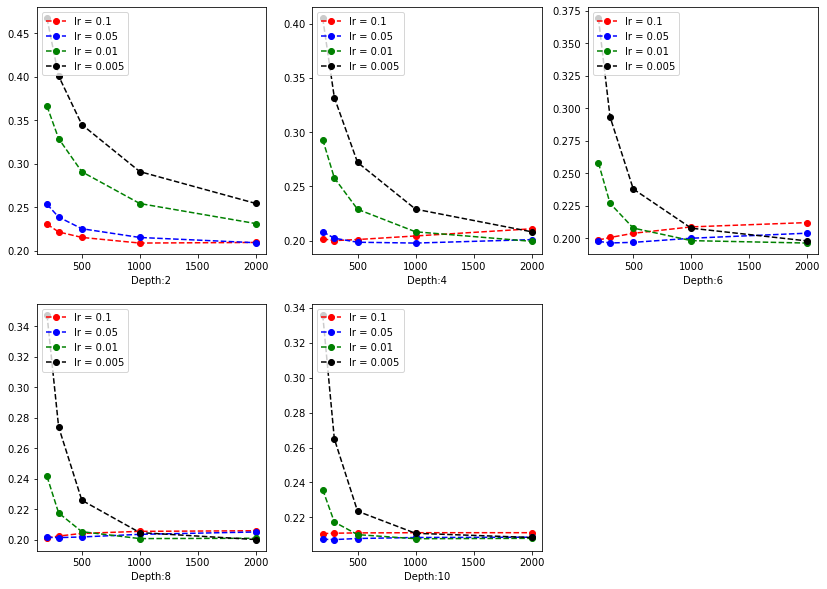

In [103]:
# 4.2 Lasso
#Ajustamos los parámetros viendo el comportamiento anterior
Niterations = [200,300,500,1000,2000]

learningRate = [0.1,0.05,0.01,0.005]
maxDepth = [2,4,6,8,10]

tuned_parameters = {'n_estimators': Niterations,'learning_rate':learningRate}
colors = ['r','b','g','k','m','o']
fig = plt.figure(figsize=(14,10))
n= 0
for d in maxDepth :
    print(d)
    n= n+1
    grid = GridSearchCV(GradientBoostingRegressor(random_state=0,max_depth=d), param_grid=tuned_parameters, cv = 5, verbose=2)
    grid.fit(X_train[Lasso_features], y_train)
    error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
    plt.subplot(2, 3, n)
    for i,lr in enumerate(learningRate):    
        plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr) 
        plt.legend(loc="upper left")
        plt.xlabel("Depth:"+str( d))
                     
                     

                
plt.show() 

In [ ]:
# Nos quedamos con 6 de profundidad, learning rate de 0.01 y 1000 iteraciones

In [112]:
Depth = 6
lrOptimo = 0.01
neOptimo = 1000
Modelbt_Lasso = GradientBoostingRegressor(random_state=0, max_depth=Depth,learning_rate=lrOptimo, n_estimators=neOptimo)
Modelbt_Lasso.fit(X_train[Lasso_features],y_train)

ytrain_Modelbt_Lasso= Modelbt_Lasso.predict(X_train[Lasso_features])
ytest_Modelbt_Lasso= Modelbt_Lasso.predict(X_test[Lasso_features])
print("Train: ",Modelbt_Lasso.score(X_train[Lasso_features],y_train))
print("Test: ",Modelbt_Lasso.score(X_test[Lasso_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_Modelbt_Lasso)
mseTest = mean_squared_error(10**y_test,10**ytest_Modelbt_Lasso)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8887990789755537
Test:  0.7970355327088046
RMSE Modelo (train): 21.9
RMSE Modelo (test) : 31.5


In [ ]:
#Viendo los resultados ajusto un poco más lo inputs para que vaya más rápido

4
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.05, n_estimators=200, total=   1.8s
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ............. learning_rate=0.05, n_estimators=200, total=   1.8s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   1.9s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   1.9s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   1.9s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   2.9s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   2.9s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   3.0s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] .

[CV] ............ learning_rate=0.005, n_estimators=300, total=   3.6s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   5.4s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   5.3s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   5.4s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   5.3s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   5.3s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] ........... learning_rate=0.005, n_estimators=1000, total=  10.8s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 11.2min finished


6
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.05, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ............. learning_rate=0.05, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   3.3s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   3.2s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   4.8s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   5.0s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   5.4s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] .

[CV] ............ learning_rate=0.005, n_estimators=300, total=   4.6s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   7.6s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   7.7s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   7.8s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   8.1s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   7.6s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] ........... learning_rate=0.005, n_estimators=1000, total=  16.0s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 16.2min finished


8
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.05, n_estimators=200, total=   4.1s
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ............. learning_rate=0.05, n_estimators=200, total=   4.5s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   4.3s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   4.1s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   4.3s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   6.3s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   7.2s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   7.7s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] .

[CV] ............ learning_rate=0.005, n_estimators=300, total=   6.0s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   9.9s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  10.4s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   9.8s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  10.0s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=   9.8s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] ........... learning_rate=0.005, n_estimators=1000, total=  20.7s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 21.3min finished


10
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.05, n_estimators=200, total=   5.4s
[CV] learning_rate=0.05, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] ............. learning_rate=0.05, n_estimators=200, total=   5.2s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   5.1s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   5.7s
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV] ............. learning_rate=0.05, n_estimators=200, total=   5.1s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   8.3s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   8.0s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] ............. learning_rate=0.05, n_estimators=300, total=   7.7s
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV] .

[CV] ............ learning_rate=0.005, n_estimators=300, total=   7.3s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  12.3s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  12.2s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  13.0s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  12.1s
[CV] learning_rate=0.005, n_estimators=500 ...........................
[CV] ............ learning_rate=0.005, n_estimators=500, total=  12.0s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] ........... learning_rate=0.005, n_estimators=1000, total=  24.9s
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 26.1min finished


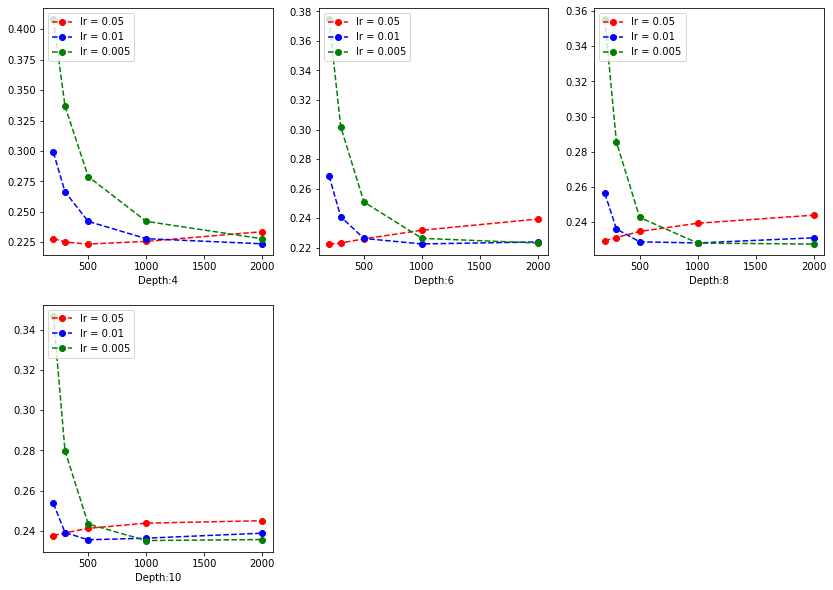

In [113]:
# 4.3 RandonForest
Niterations = [200,300,500,1000,2000]

learningRate = [0.05,0.01,0.005]
maxDepth = [4,6,8,10]

tuned_parameters = {'n_estimators': Niterations,'learning_rate':learningRate}
colors = ['r','b','g','k','m','o']
fig = plt.figure(figsize=(14,10))
n= 0
for d in maxDepth :
    print(d)
    n= n+1
    grid = GridSearchCV(GradientBoostingRegressor(random_state=0,max_depth=d), param_grid=tuned_parameters, cv = 5, verbose=2)
    grid.fit(X_train[RandomForest_features], y_train)
    error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
    plt.subplot(2, 3, n)
    for i,lr in enumerate(learningRate):    
        plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr) 
        plt.legend(loc="upper left")
        plt.xlabel("Depth:"+str( d))
                     
                     

                
plt.show() 

In [ ]:
profundidad de 6, learning rate de 0.01 y 1000 iteraciones

In [121]:
Depth = 6
lrOptimo = 0.01
neOptimo = 1000
Modelbt_RandomForest = GradientBoostingRegressor(random_state=0, max_depth=Depth,learning_rate=lrOptimo, n_estimators=neOptimo)
Modelbt_RandomForest.fit(X_train[RandomForest_features],y_train)

ytrain_Modelbt_RandomForest= Modelbt_RandomForest.predict(X_train[RandomForest_features])
ytest_Modelbt_RandomForest= Modelbt_RandomForest.predict(X_test[RandomForest_features])
print("Train: ",Modelbt_RandomForest.score(X_train[RandomForest_features],y_train))
print("Test: ",Modelbt_RandomForest.score(X_test[RandomForest_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_Modelbt_RandomForest)
mseTest = mean_squared_error(10**y_test,10**ytest_Modelbt_RandomForest)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8617670815556938
Test:  0.7751755303891545
RMSE Modelo (train): 24
RMSE Modelo (test) : 32.3


El modelo Boosted mejora los resultados de los modelos anteriores. Mejora tanto train como test. De nuevo el modelo que mejores métricas da es con la selección de características de Lasso.

In [51]:
# 5 SVM Kernel
from sklearn.svm import SVR
from sklearn import preprocessing



#En este caso tendremos que estandarizar por ser un algoritmo basado en distancias


In [61]:
# 5.1 MI
vectorC = np.logspace(-2, 4, 8)
vectorG = np.logspace(-7, 1, 8)
scaler = preprocessing.StandardScaler().fit(X_train[MI_features])
XtrainScaled = scaler.transform(X_train[MI_features])
XtestScaled  = scaler.transform(X_test[MI_features])

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.01, gamma=1e-07 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, gamma=1e-07, total=   1.3s
[CV] C=0.01, gamma=1e-07 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .............................. C=0.01, gamma=1e-07, total=   1.3s
[CV] C=0.01, gamma=1e-07 .............................................
[CV] .............................. C=0.01, gamma=1e-07, total=   1.3s
[CV] C=0.01, gamma=1e-07 .............................................
[CV] .............................. C=0.01, gamma=1e-07, total=   1.3s
[CV] C=0.01, gamma=1e-07 .............................................
[CV] .............................. C=0.01, gamma=1e-07, total=   1.3s
[CV] C=0.01, gamma=1.389495494373136e-06 .............................
[CV] .............. C=0.01, gamma=1.389495494373136e-06, total=   1.3s
[CV] C=0.01, gamma=1.389495494373136e-06 .............................
[CV] .............. C=0.01, gamma=1.389495494373136e-06, total=   1.3s
[CV] C=0.01, gamma=1.389495494373136e-06 .............................
[CV] .............. C=0.01, gamma=1.389495494373136e-06, total=   1.5s
[CV] C=0.01, gamma=1.389495494373136e-06 .............................
[CV] .

[CV]  C=0.07196856730011521, gamma=0.00026826957952797245, total=   1.2s
[CV] C=0.07196856730011521, gamma=0.003727593720314938 ...............
[CV]  C=0.07196856730011521, gamma=0.003727593720314938, total=   1.1s
[CV] C=0.07196856730011521, gamma=0.003727593720314938 ...............
[CV]  C=0.07196856730011521, gamma=0.003727593720314938, total=   1.1s
[CV] C=0.07196856730011521, gamma=0.003727593720314938 ...............
[CV]  C=0.07196856730011521, gamma=0.003727593720314938, total=   1.3s
[CV] C=0.07196856730011521, gamma=0.003727593720314938 ...............
[CV]  C=0.07196856730011521, gamma=0.003727593720314938, total=   1.3s
[CV] C=0.07196856730011521, gamma=0.003727593720314938 ...............
[CV]  C=0.07196856730011521, gamma=0.003727593720314938, total=   1.1s
[CV] C=0.07196856730011521, gamma=0.05179474679231202 ................
[CV] . C=0.07196856730011521, gamma=0.05179474679231202, total=   1.0s
[CV] C=0.07196856730011521, gamma=0.05179474679231202 ................
[CV]

[CV] .................. C=0.517947467923121, gamma=10.0, total=   2.7s
[CV] C=0.517947467923121, gamma=10.0 .................................
[CV] .................. C=0.517947467923121, gamma=10.0, total=   2.7s
[CV] C=0.517947467923121, gamma=10.0 .................................
[CV] .................. C=0.517947467923121, gamma=10.0, total=   3.0s
[CV] C=3.727593720314938, gamma=1e-07 ................................
[CV] ................. C=3.727593720314938, gamma=1e-07, total=   1.6s
[CV] C=3.727593720314938, gamma=1e-07 ................................
[CV] ................. C=3.727593720314938, gamma=1e-07, total=   1.6s
[CV] C=3.727593720314938, gamma=1e-07 ................................
[CV] ................. C=3.727593720314938, gamma=1e-07, total=   1.6s
[CV] C=3.727593720314938, gamma=1e-07 ................................
[CV] ................. C=3.727593720314938, gamma=1e-07, total=   1.6s
[CV] C=3.727593720314938, gamma=1e-07 ................................
[CV] .

[CV]  C=26.826957952797247, gamma=0.00026826957952797245, total=   1.2s
[CV] C=26.826957952797247, gamma=0.00026826957952797245 ..............
[CV]  C=26.826957952797247, gamma=0.00026826957952797245, total=   1.3s
[CV] C=26.826957952797247, gamma=0.00026826957952797245 ..............
[CV]  C=26.826957952797247, gamma=0.00026826957952797245, total=   1.2s
[CV] C=26.826957952797247, gamma=0.00026826957952797245 ..............
[CV]  C=26.826957952797247, gamma=0.00026826957952797245, total=   1.3s
[CV] C=26.826957952797247, gamma=0.00026826957952797245 ..............
[CV]  C=26.826957952797247, gamma=0.00026826957952797245, total=   1.3s
[CV] C=26.826957952797247, gamma=0.003727593720314938 ................
[CV] . C=26.826957952797247, gamma=0.003727593720314938, total=   2.0s
[CV] C=26.826957952797247, gamma=0.003727593720314938 ................
[CV] . C=26.826957952797247, gamma=0.003727593720314938, total=   2.2s
[CV] C=26.826957952797247, gamma=0.003727593720314938 ................
[

[CV] ... C=193.06977288832496, gamma=0.7196856730011514, total=  37.6s
[CV] C=193.06977288832496, gamma=0.7196856730011514 ..................
[CV] ... C=193.06977288832496, gamma=0.7196856730011514, total=  34.7s
[CV] C=193.06977288832496, gamma=10.0 ................................
[CV] ................. C=193.06977288832496, gamma=10.0, total=   9.9s
[CV] C=193.06977288832496, gamma=10.0 ................................
[CV] ................. C=193.06977288832496, gamma=10.0, total=  10.0s
[CV] C=193.06977288832496, gamma=10.0 ................................
[CV] ................. C=193.06977288832496, gamma=10.0, total=   9.6s
[CV] C=193.06977288832496, gamma=10.0 ................................
[CV] ................. C=193.06977288832496, gamma=10.0, total=  10.4s
[CV] C=193.06977288832496, gamma=10.0 ................................
[CV] ................. C=193.06977288832496, gamma=10.0, total=  10.2s
[CV] C=1389.4954943731361, gamma=1e-07 ...............................
[CV] .

[CV] .......... C=10000.0, gamma=1.9306977288832496e-05, total=   3.9s
[CV] C=10000.0, gamma=1.9306977288832496e-05 .........................
[CV] .......... C=10000.0, gamma=1.9306977288832496e-05, total=   3.9s
[CV] C=10000.0, gamma=1.9306977288832496e-05 .........................
[CV] .......... C=10000.0, gamma=1.9306977288832496e-05, total=   3.6s
[CV] C=10000.0, gamma=1.9306977288832496e-05 .........................
[CV] .......... C=10000.0, gamma=1.9306977288832496e-05, total=   3.9s
[CV] C=10000.0, gamma=0.00026826957952797245 .........................
[CV] .......... C=10000.0, gamma=0.00026826957952797245, total=  23.5s
[CV] C=10000.0, gamma=0.00026826957952797245 .........................
[CV] .......... C=10000.0, gamma=0.00026826957952797245, total=  24.4s
[CV] C=10000.0, gamma=0.00026826957952797245 .........................
[CV] .......... C=10000.0, gamma=0.00026826957952797245, total=  26.4s
[CV] C=10000.0, gamma=0.00026826957952797245 .........................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 837.1min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 7.19685673e-02, 5.17947468e-01, 3.72759372e+00,
       2.68269580e+01, 1.93069773e+02, 1.38949549e+03, 1.00000000e+04]),
                         'gamma': array([1.00000000e-07, 1.38949549e-06, 1.93069773e-05, 2.68269580e-04,
       3.72759372e-03, 5.17947468e-02, 7.19685673e-01, 1.00000000e+01])},
             verbose=2)

best mean cross-validation score: 0.732
best parameters: {'C': 3.727593720314938, 'gamma': 0.05179474679231202}


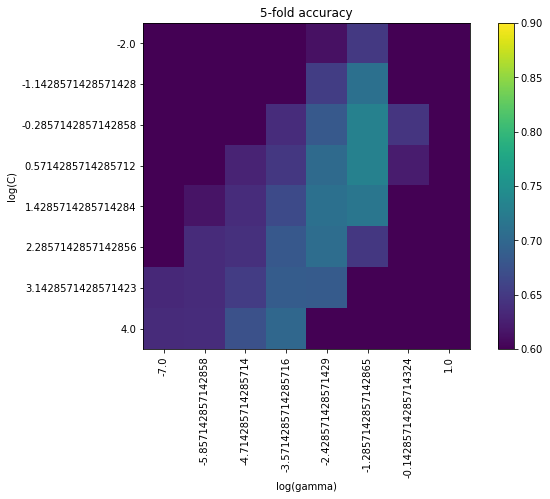

In [62]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']


Model_svm_MI = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
ytrain_Model_svm_MI= Model_svm_MI.predict(XtrainScaled)
ytest_Model_svm_MI= Model_svm_MI.predict(XtestScaled)
print("Train: ",Model_svm_MI.score(XtrainScaled,y_train))
print("Test: ",Model_svm_MI.score(XtestScaled,y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_Model_svm_MI)
mseTest = mean_squared_error(10**y_test,10**ytest_Model_svm_MI)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.7832446313423301
Test:  0.7305002751568568
RMSE Modelo (train): 29.5
RMSE Modelo (test) : 37.2


No vamos a lanzar el modelo con el resto de selección de características, debido a que computacionalemente es lento y parece que los resultados son peores que con otros modelos.

Con los resultados que tenemos, parece que el modelo que mejor se ajusta a los datos es Boosted usando la selección de categorías mediante lasso, o mediente la selección de caracteristicas de random forest obtenemos resultados similares.
Es cierto, que parece que la brecha entre train y test es mayor que con otros modelos.Por lo que puede que estemos pecando de un modelo un tanto complejo, pero obtenemos mejor resultado con él también en la parte de test.


In [ ]:
# Modelo óptimo

Vamos a quedarnos con la selección de característica obtenida por Lasso. Pero vamos a reducir la profundidad, empeora ligeramente train,pero el modelo es menos complejo y en test se mantienen los resultados.

In [72]:
Depth = 4
lrOptimo = 0.01
neOptimo = 2000
Modelbt_Lasso = GradientBoostingRegressor(random_state=0, max_depth=Depth,learning_rate=lrOptimo, n_estimators=neOptimo)
Modelbt_Lasso.fit(X_train[Lasso_features],y_train)

ytrain_Modelbt_Lasso= Modelbt_Lasso.predict(X_train[Lasso_features])
ytest_Modelbt_Lasso= Modelbt_Lasso.predict(X_test[Lasso_features])
print("Train: ",Modelbt_Lasso.score(X_train[Lasso_features],y_train))
print("Test: ",Modelbt_Lasso.score(X_test[Lasso_features],y_test))
mseTrain = mean_squared_error(10**y_train,10**ytrain_Modelbt_Lasso)
mseTest = mean_squared_error(10**y_test,10**ytest_Modelbt_Lasso)
print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Train:  0.8520393716517882
Test:  0.7937816572819203
RMSE Modelo (train): 26.1
RMSE Modelo (test) : 30.6


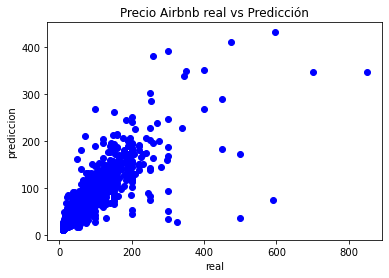

In [81]:
plt.scatter(10**y_test, 10**ytest_Modelbt_Lasso, color = 'blue')

plt.title('Precio Airbnb real vs Predicción')
plt.xlabel('real')
plt.ylabel('prediccion')
plt.show()

Se ve que los datos están entorno a una recta de 45º como cabe esperar, excepto para unos apartamentos, que parece que el modelo generaliza mal donde el real es muy superior al estimado.